## **1 - Perform an Explanatory data analysis (EDA) with visualization using the entire dataset**

In an EDA Process we need to:
- Understand Column Meaning
- Check Data Integrity
- Visualize Distribution
- Pair plots for Relationships

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import requests

In [115]:
shopeasy_df = pd.read_csv('shopeasy.csv')

## 1 - Understanding Column Meaning

To analyze your dataset effectively, it is important to understand the meaning and significance of each column or attribute in our dataset, as this provides context for your data.

TO TAKE AN OVERVIEW OF THE DATA WE USED THE FOLLOWING FUNCTIONS:
df.head() ,df.info() ,df.describe() ,df.shape

 -df.head() allows us take a look at what the data looks like 

In [116]:
shopeasy_df.head()

,personId,accountTotal,frequencyIndex,itemCosts,singleItemCosts,multipleItemCosts,emergencyFunds,itemBuyFrequency,singleItemBuyFrequency,multipleItemBuyFrequency,...,emergencyCount,itemCount,maxSpendLimit,monthlyPaid,leastAmountPaid,paymentCompletionRate,accountLifespan,location,accountType,webUsage
0,C10573,1034.660626,0.833333,1308.11,1308.11,0.00,234.602843,0.500000,0.500000,0.000000,...,1,8,1500.0,236.764555,207.007715,0.00,6,New York,Premium,60
1,C16889,777.853474,0.666667,0.00,0.00,0.00,1820.143378,0.000000,0.000000,0.000000,...,8,0,2000.0,89.741508,173.276205,0.00,6,Los Angeles,Premium,5
2,C12964,97.453056,0.818182,334.73,334.73,0.00,19.551802,0.083333,0.083333,0.000000,...,1,1,2500.0,234.271939,117.297542,0.25,12,New York,Student,21
3,C11171,0.000000,0.000000,12.65,0.00,12.65,0.000000,0.083333,0.000000,0.083333,...,0,1,5000.0,0.000000,NaN,0.00,12,Chicago,Premium,53
4,C17582,18.120946,0.500000,57.00,57.00,0.00,0.000000,0.166667,0.166667,0.000000,...,0,1,1500.0,118.438703,54.138711,0.00,6,New York,Premium,59


The dataset for ShopEasy is a comprehensive collection of user data that captures various aspects of customer behavior and interaction with the e-commerce platform. This dataset provides valuable insights into how customers engage with the platform, what products they are interested in, and how they navigate through the website. By analyzing this data, businesses can gain a better understanding of their customers' preferences, optimize their website's user experience, and make data-driven decisions to improve their overall performance. 
Here's a breakdown of each feature:

- **personId**: A unique identifier assigned to each user

- **accountTotal**: This represents the total amount a user has spent on ShopEasy since their account was created. 

- **frequencyIndex**: A numerical value indicating how frequently a user shops. A value of 1 denotes very frequent shopping, while values less than 1 indicate less frequent shopping.

- **itemCosts**: The cumulative cost of all items a user has purchased. 

- **singleItemCosts**: The costs of items bought in a single transaction without using installment plans. 

- **multipleItemCosts**: The costs of items that users have chosen to pay for in installments. 

- **emergencyFunds**: The amount of money a user keeps in their ShopEasy wallet as a reserve for quick checkouts or emergency situations.

- **itemBuyFrequency**: How often a user makes purchases, providing insight into customer engagement with the platform.

- **singleItemBuyFrequency**: The frequency of making single-item purchases without installment plans, which can indicate impulse buying or specific needs.

- **multipleItemBuyFrequency**: Frequency of opting for installment-based purchases.

- **emergencyUseFrequency**: How often a user dips into their emergency funds.

- **emergencyCount**: The number of times emergency funds have been used.

- **itemCount**: Total number of items a user has purchased, which helps in understanding purchasing habits and product preferences.

- **maxSpendLimit**: The maximum spending limit set by ShopEasy for a user, based on their buying behavior and loyalty. It's a risk management measure.

- **monthlyPaid**: The total amount a user pays on the platform each month, useful for understanding user spending patterns over time.

- **leastAmountPaid**: The smallest amount paid by the user in a single transaction.

- **paymentCompletionRate**: The percentage of purchases where the user has completed payment in full.

- **accountLifespan**: The duration for which the user has been registered on ShopEasy.

- **location**: The user's city or region, which can be crucial for regional marketing strategies and understanding geographical preferences.

- **accountType**: Categorizes users into 'Regular', 'Premium' (those with premium services), and 'Student' (registered with a student ID), indicating different user segments.

- **webUsage**: A score from 0 to 100 representing how frequently a user shops via web browsers. A higher score suggests more frequent web usage.

 -df.info() method is useful to get a quick description of the data, in particular the
total number of rows, each attribute’s type, and the number of non-null values.

In [117]:
shopeasy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   personId                  8950 non-null   object 
 1   accountTotal              8950 non-null   float64
 2   frequencyIndex            8950 non-null   float64
 3   itemCosts                 8950 non-null   float64
 4   singleItemCosts           8950 non-null   float64
 5   multipleItemCosts         8950 non-null   float64
 6   emergencyFunds            8950 non-null   float64
 7   itemBuyFrequency          8950 non-null   float64
 8   singleItemBuyFrequency    8950 non-null   float64
 9   multipleItemBuyFrequency  8950 non-null   float64
 10  emergencyUseFrequency     8950 non-null   float64
 11  emergencyCount            8950 non-null   int64  
 12  itemCount                 8950 non-null   int64  
 13  maxSpendLimit             8949 non-null   float64
 14  monthlyP

-df.describe() gives us some basic statistical details

In [118]:
shopeasy_df.describe()

,accountTotal,frequencyIndex,itemCosts,singleItemCosts,multipleItemCosts,emergencyFunds,itemBuyFrequency,singleItemBuyFrequency,multipleItemBuyFrequency,emergencyUseFrequency,emergencyCount,itemCount,maxSpendLimit,monthlyPaid,leastAmountPaid,paymentCompletionRate,accountLifespan,webUsage
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318,49.422570
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331,28.808219
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000,0.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000,24.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000,49.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000,74.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,99.000000


 -df.shape gives us  the shape of our DataFrame. From the output we can see that we have 21 columns and 8950 rows.

In [119]:
shopeasy_df.shape

(8950, 21)

We now have a look at the number of rows too.

## 2- Checking Data Integrity

Make sure your dataset is complete by checking for missing values (NaNs) and outliers. It's important to address data quality issues to ensure accurate analysis.

Let's remember we can identify three different types of missingness:
1. **Missing Completely at Random (MCAR)** 
2. **Missing at Random (MAR)**
3. **Missing Not at Random (MNAR)**

In [120]:
nan_count = shopeasy_df.isnull().sum()

# Display the count of NaN values for each column
print("NaN count in each column:")
print(nan_count)

NaN count in each column:
personId                      0
accountTotal                  0
frequencyIndex                0
itemCosts                     0
singleItemCosts               0
multipleItemCosts             0
emergencyFunds                0
itemBuyFrequency              0
singleItemBuyFrequency        0
multipleItemBuyFrequency      0
emergencyUseFrequency         0
emergencyCount                0
itemCount                     0
maxSpendLimit                 1
monthlyPaid                   0
leastAmountPaid             313
paymentCompletionRate         0
accountLifespan               0
location                      0
accountType                   0
webUsage                      0
dtype: int64


We have missing values!!

That is why we resort to using **Missingno** which is a Python library that helps visualize and analyze missing data in datasets. It provides visualizations and tools to gain insights into missing values, including:

- **Matrix Plot:** Visual representation of missing values in the dataset, revealing patterns and areas with high or low missingness.
- **Bar Chart:** Displays the number of missing values per column, giving an overview of missing data across attributes.
- **Heatmap:** Visualizes the correlation between missing values in pairs of columns, identifying relationships between missingness in different variables.

**What are its benefits?**
**Quick Assessment**: Missingno provides a swift and clear view of missing data in your dataset. This tool is handy for a preliminary check on data quality and completeness.

**Pattern Identification**: It allows you to discern various patterns of missing data, such as whether they are missing completely at random, missing at random, or missing in a non-random manner.

**Data Imputation**: By visualizing missing data, Missingno aids in making strategic decisions about data imputation, using methods like mean, median, mode, or more advanced predictive models.

**Data Cleaning**: Missingno is beneficial for the data cleaning process, highlighting the columns that have significant amounts of missing data and may need further attention, either through imputation or removal.

In [121]:
import missingno as msno

**Matrix Plot**

<Axes: >

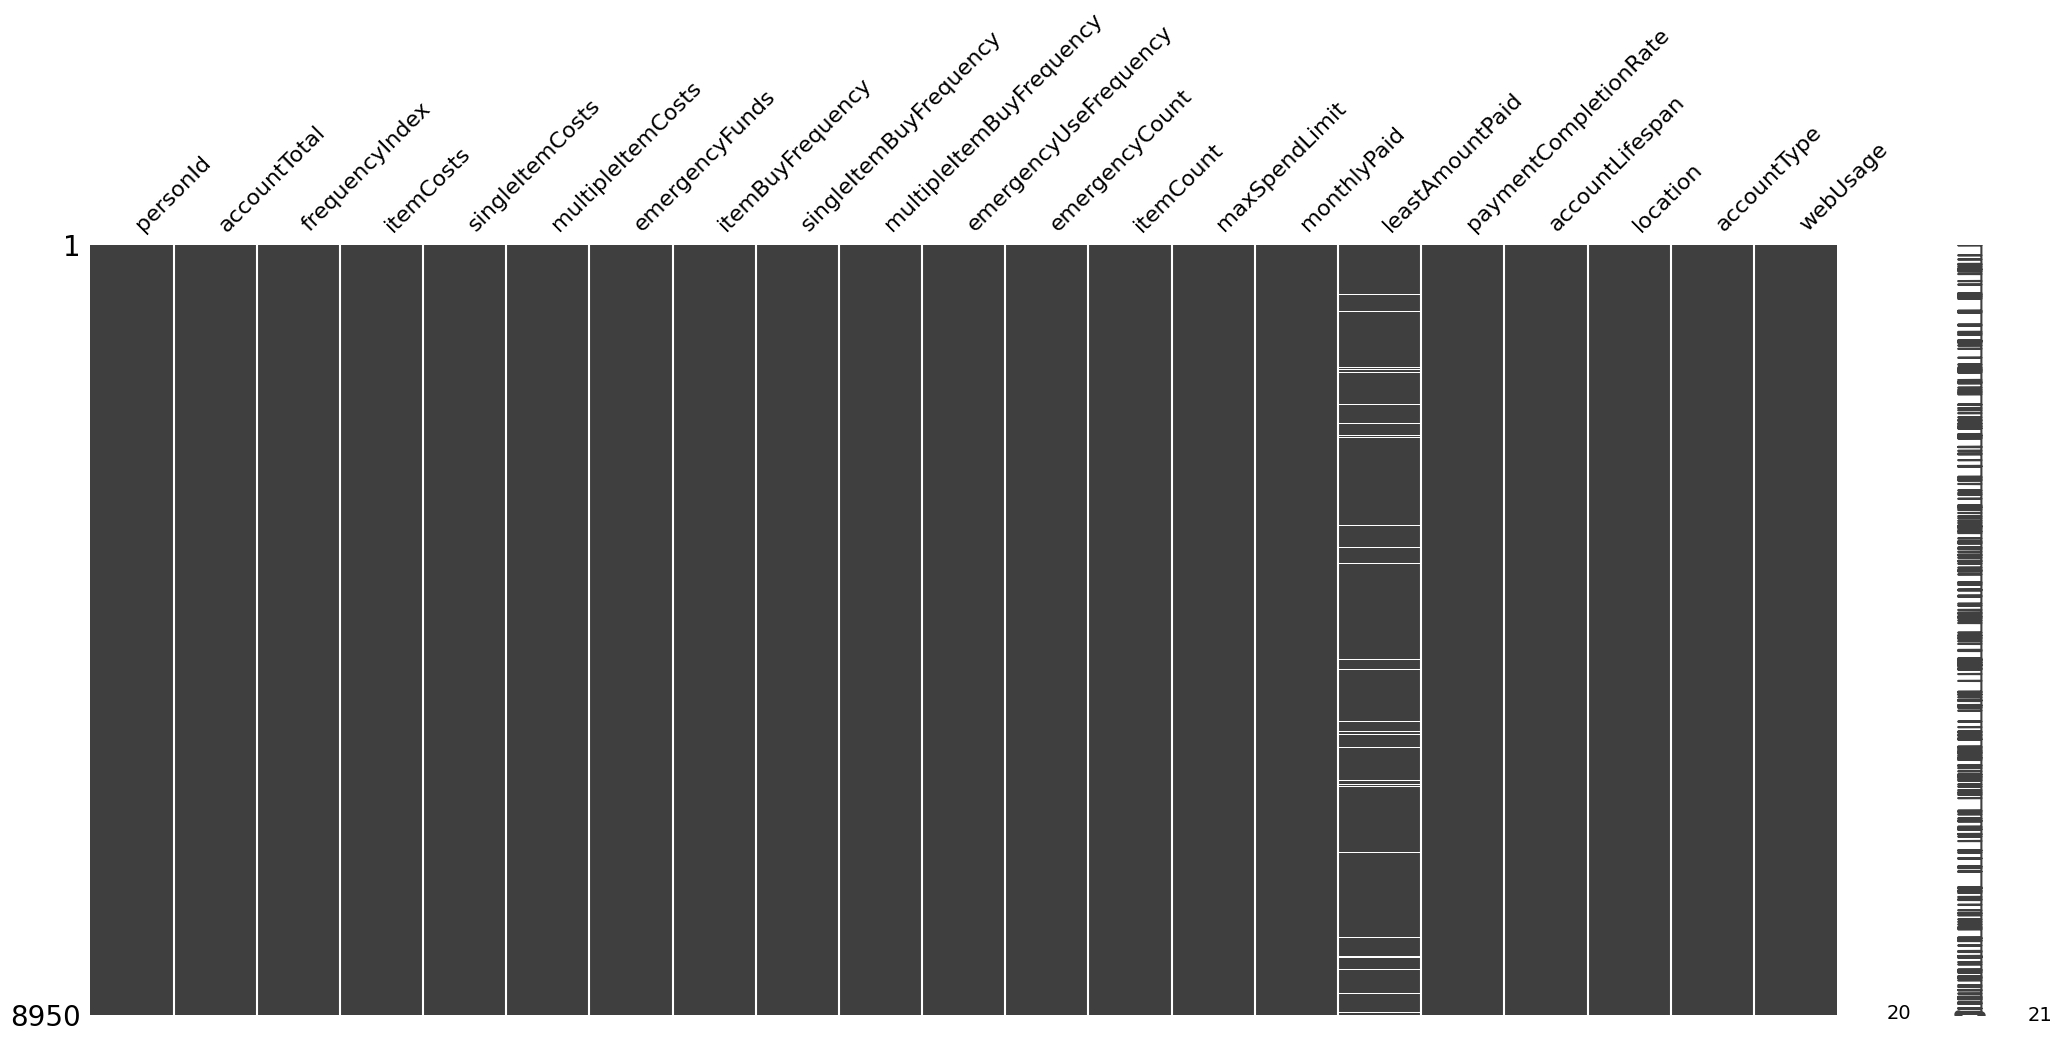

In [122]:
msno.matrix(shopeasy_df)

**Barchart**

<Axes: >

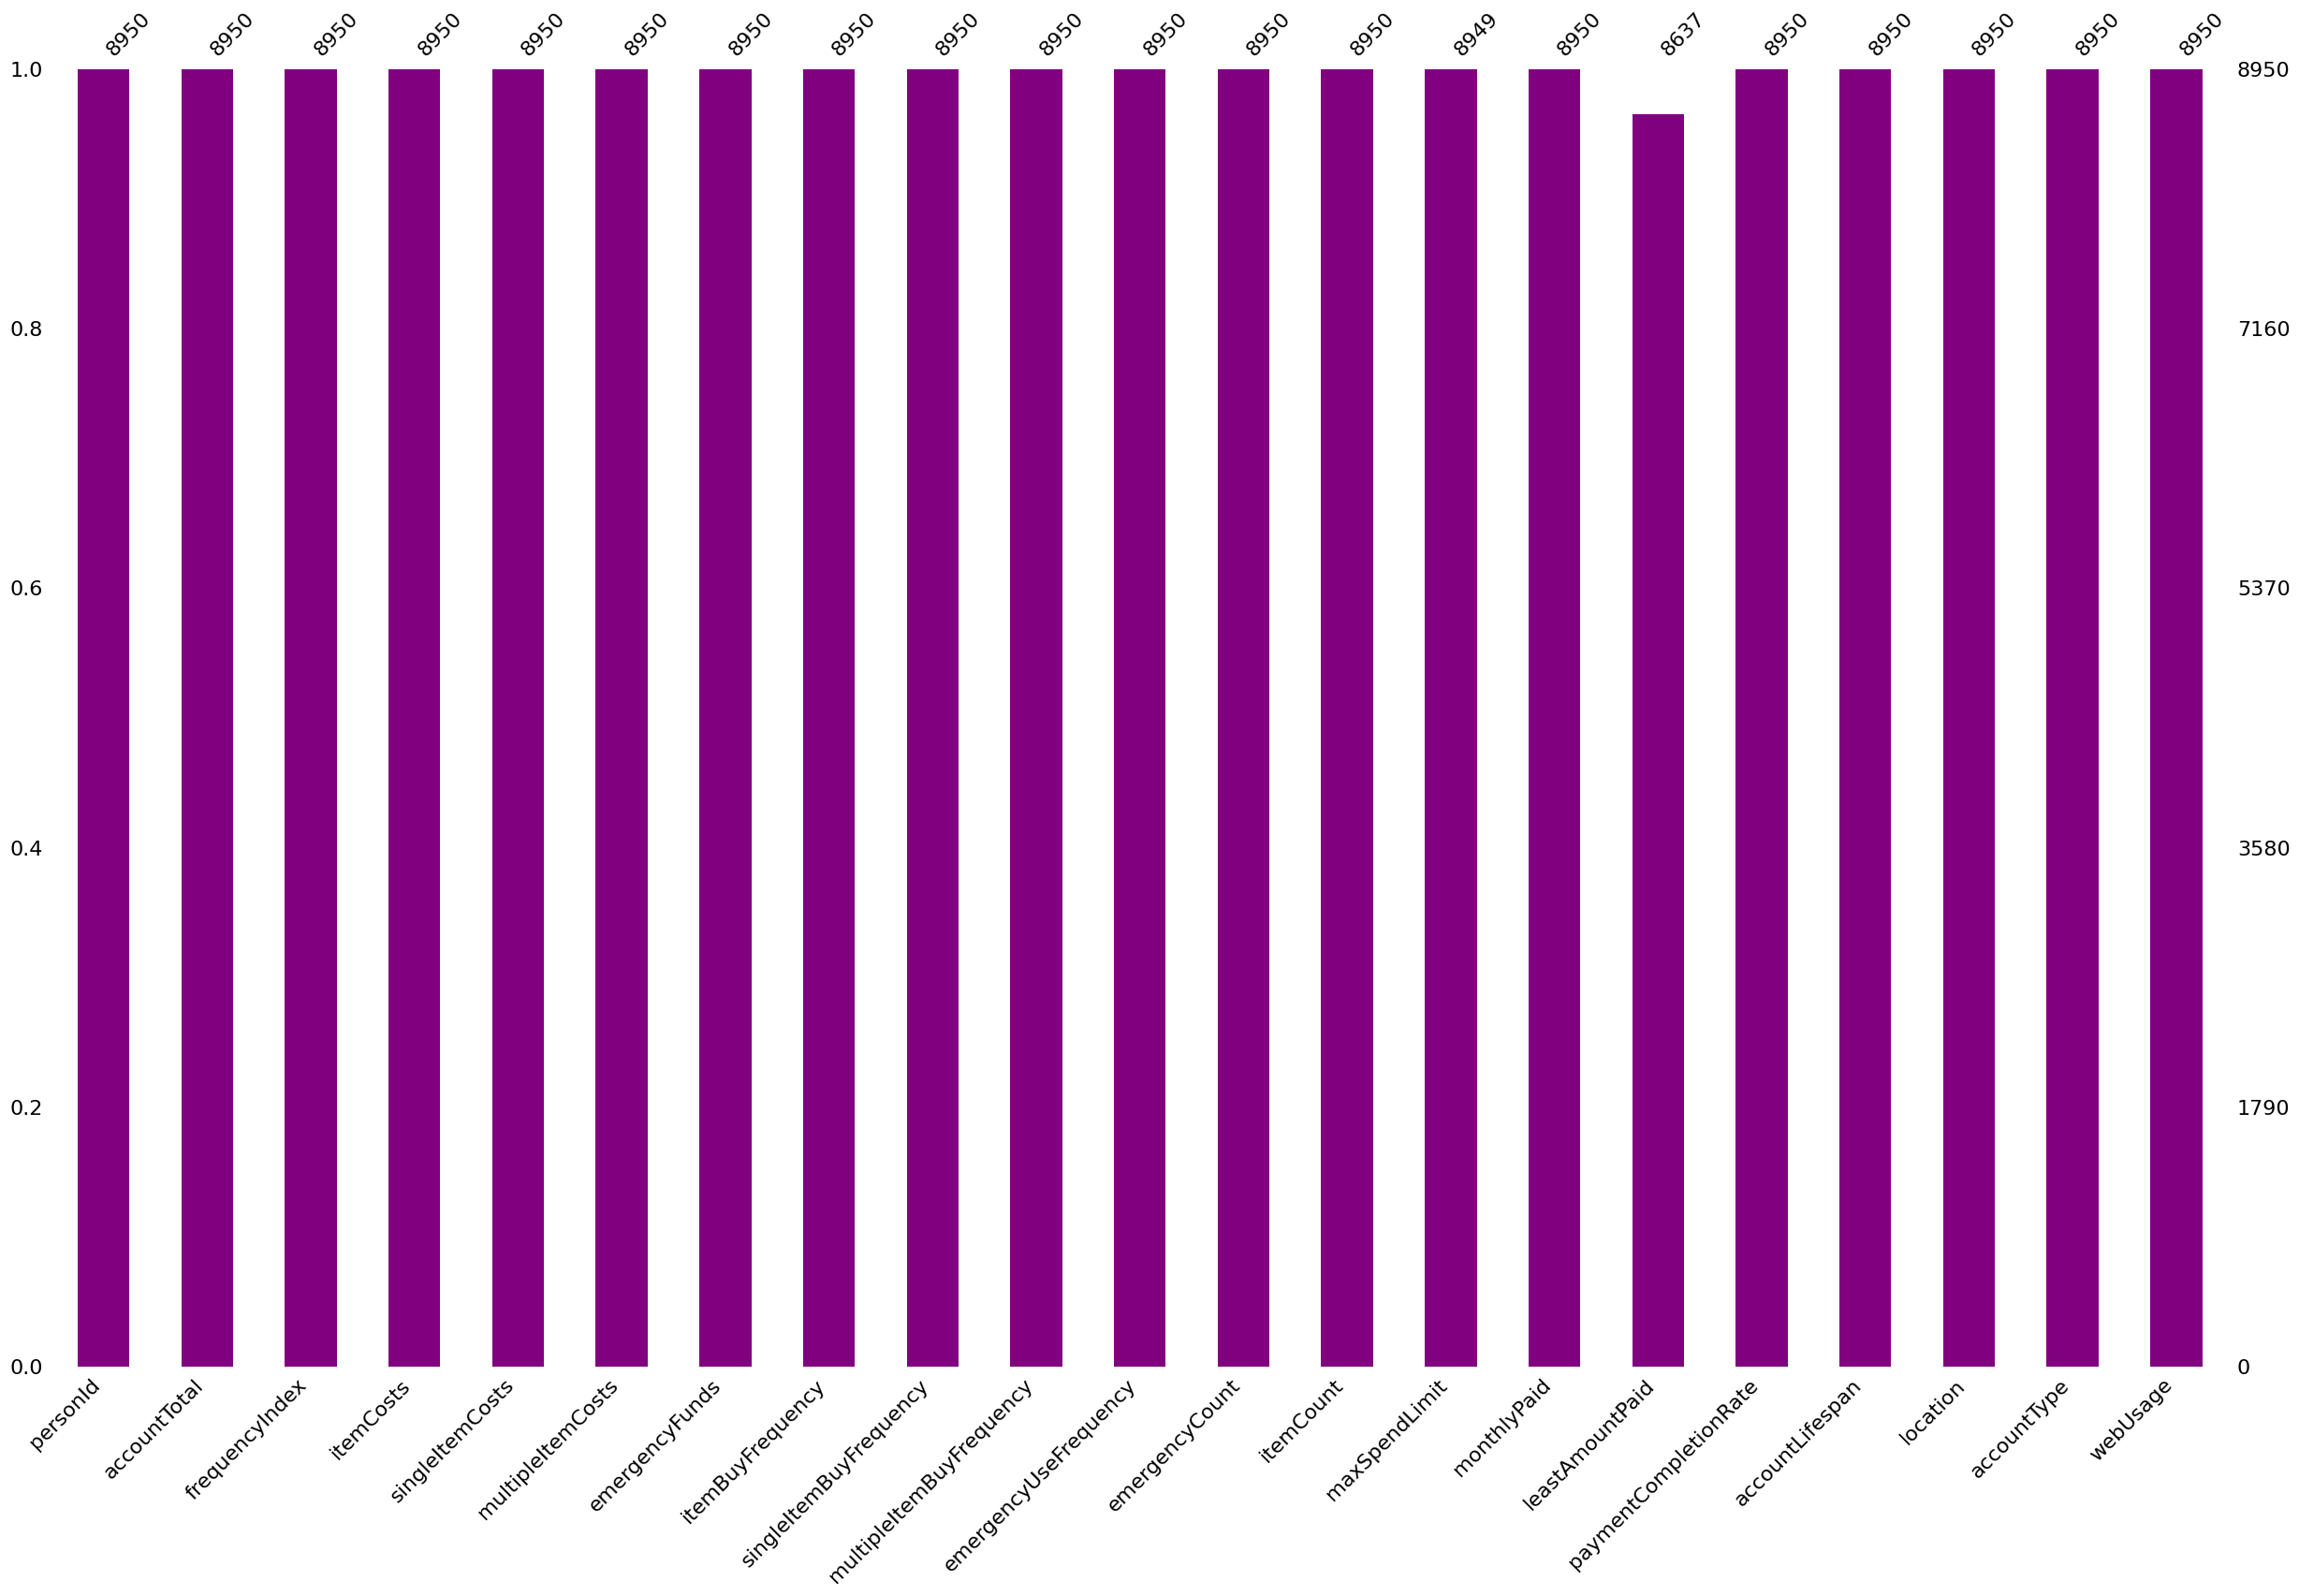

In [123]:
msno.bar(shopeasy_df, color="purple", figsize= (30,18) , labels=True)

**Heatmap**

<Axes: >

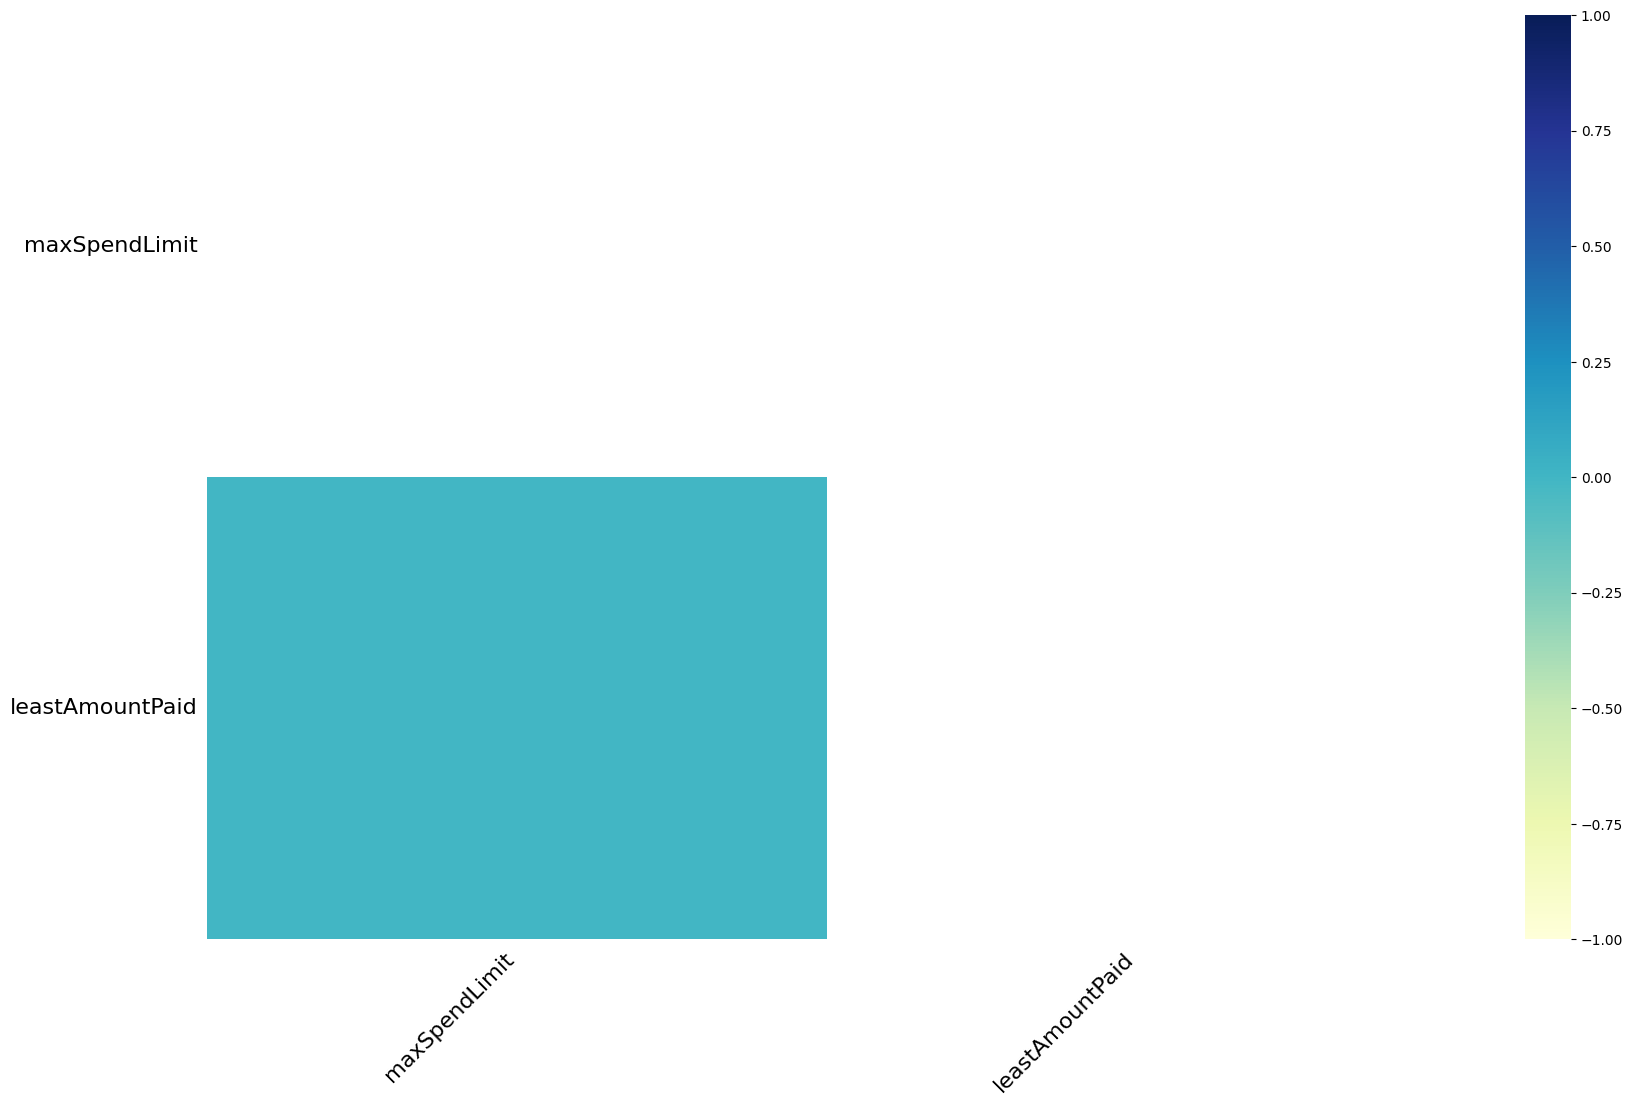

In [124]:
msno.heatmap(shopeasy_df, cmap='YlGnBu', labels=True)

In [125]:
def analyze_missing_data(dataframe):
    # Calculate the number of missing values and the percentage
    missing_counts = dataframe.isna().sum()
    percent_missing = (missing_counts / len(dataframe)) * 100

    # Create a DataFrame for missing data analysis
    missing_data = pd.DataFrame({
        'Missing Values Count': missing_counts,
        'Percentage of Total': percent_missing
    })

    # Filter out columns with no missing data and sort by percentage
    missing_data_filtered = missing_data[missing_data['Missing Values Count'] > 0]
    missing_data_sorted = missing_data_filtered.sort_values(by='Percentage of Total', ascending=False).round(1)

    # Display summary information
    total_columns = len(dataframe.columns)
    columns_with_missing = len(missing_data_sorted)
    print(f"Your dataframe has {total_columns} columns.")
    print(f"Out of these, {columns_with_missing} columns have missing values.")

    return missing_data_sorted

# Using the function on the ShopEasy dataset
analyze_missing_data(shopeasy_df)


Your dataframe has 21 columns.
Out of these, 2 columns have missing values.


,Missing Values Count,Percentage of Total
leastAmountPaid,313,3.5
maxSpendLimit,1,0.0


**Investigate Missing Data**
We need to know whether the missingness of the data is random or systematic. Specifically we aim to determine whether the absence of data in the columns follow a specific structure or if it occur entirely at random. It is crucial since it can help us make informed decisions about how to handle missing data effectively.

In order to do this, we will follow the following steps:
- **Distribution Analysis**: we analyze the distribution of missing values in the specified column.
- **Comparison of Distribution**: we compare the value distributions of the dataset made up of rows with missing values in the specified column against the distribution of the entire dataset.
- **Interpretation**: Following the analysis, we will deduce whether the absence of data in the specified column seems to be a matter of chance or if it exhibits any noticeable trends or correlationswith other variables in the dataset.

## Investigate Missing Data in 'leastAmountPaid' column

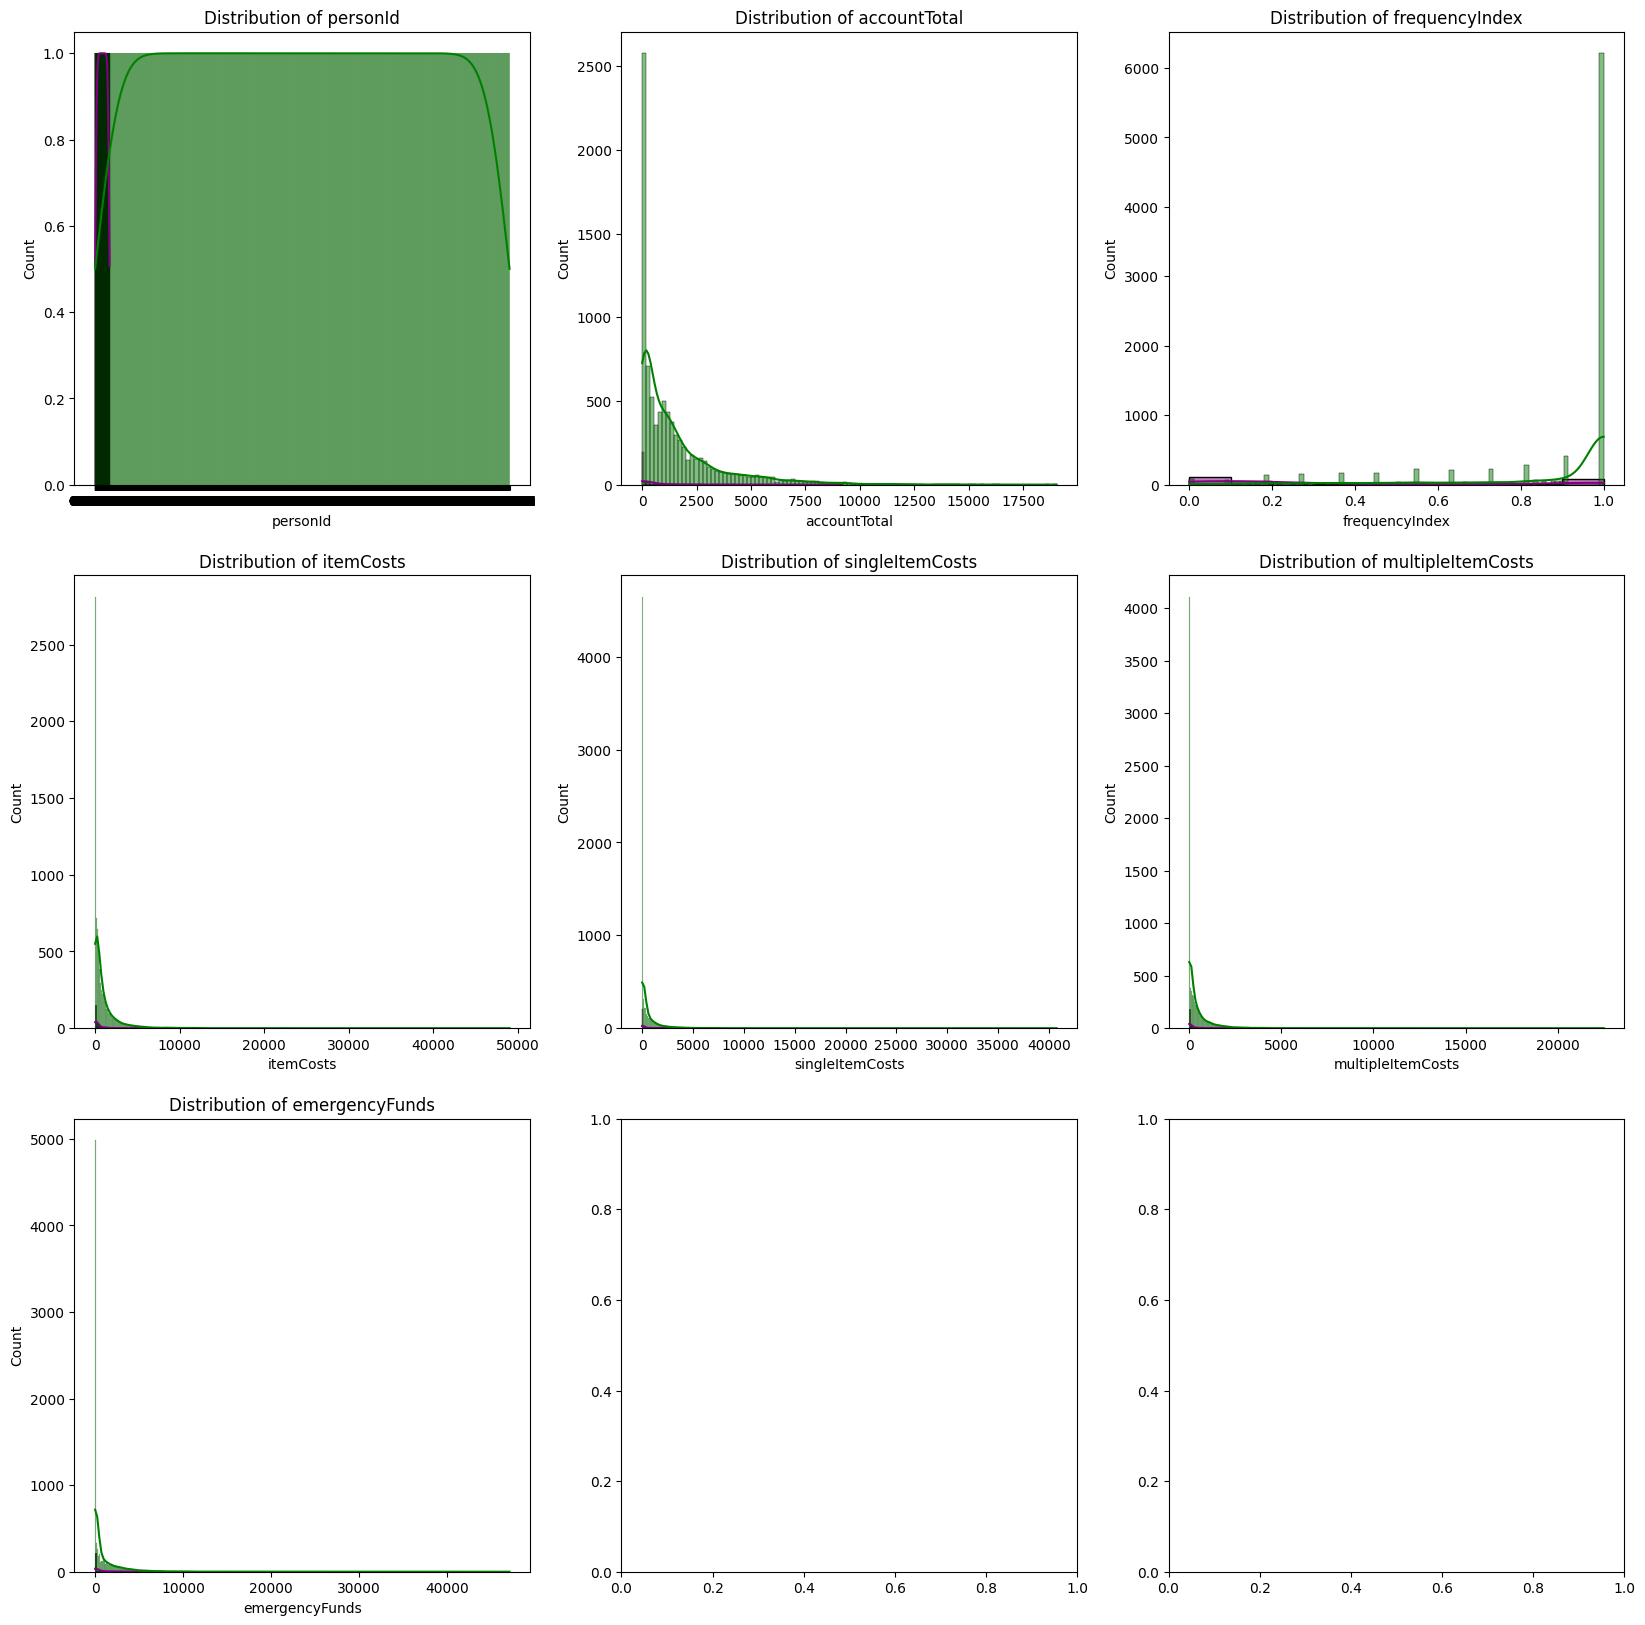

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt

missing_leastAmountPaid_rows = shopeasy_df[shopeasy_df['leastAmountPaid'].isnull()]
selected_columns = ['personId', 'accountTotal', 'frequencyIndex','itemCosts','singleItemCosts','multipleItemCosts', 'emergencyFunds']

fig,axes= plt.subplots(3,3, figsize=(20,20))

# Plot distribution plots for each selected column
for i, column in enumerate(selected_columns):
    sns.histplot(data=missing_leastAmountPaid_rows, x=column, ax=axes[i//3, i%3], kde=True, color='purple')
    sns.histplot(data=shopeasy_df, x=column, ax=axes[i//3, i%3], kde=True, color='green')
    axes[i//3, i%3].set_title(f"Distribution of {column}")
    
plt.tight_layout

plt.show()

NOW WE CAN USE TWO DIFFERENT APPROACHES: 

For the 'leastAmountPaid' we'll use both, while for 'maxSpendLimit' we'll only use one.

## Drop the data

In [127]:
# Drop rows with missing values in the leastAmountPaid column
dropped_leastAmountPaid_rows = shopeasy_df.dropna(subset=['leastAmountPaid'])

#number of rows dropped
rows_dropped = len(shopeasy_df) - len(dropped_leastAmountPaid_rows)

# Print the number of dropped rows
print(f"Number of rows dropped: {rows_dropped}")

Number of rows dropped: 313


In [128]:
#drop the leastAmountPaid column
shopeasy_df = shopeasy_df.drop(columns=['leastAmountPaid'])

## Impute the Data

In [129]:
shopeasy_df = pd.read_csv('shopEasy.csv')


In [130]:
from sklearn.impute import SimpleImputer

#impute missing 'leastAmountPaid' values using SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
shopeasy_df_imputed = shopeasy_df.copy()
shopeasy_df_imputed['leastAmountPaid'] = imputer.fit_transform(shopeasy_df_imputed[['leastAmountPaid']])

# Check the number of missing values after imputation
missing_values_after_imputation = shopeasy_df_imputed['leastAmountPaid'].isnull().sum()

# Print the number of missing values after imputation
print(f"Number of Missing Values after Imputation: {missing_values_after_imputation}")



Number of Missing Values after Imputation: 0


## Investigate Missing Data in 'maxSpendLimit' column

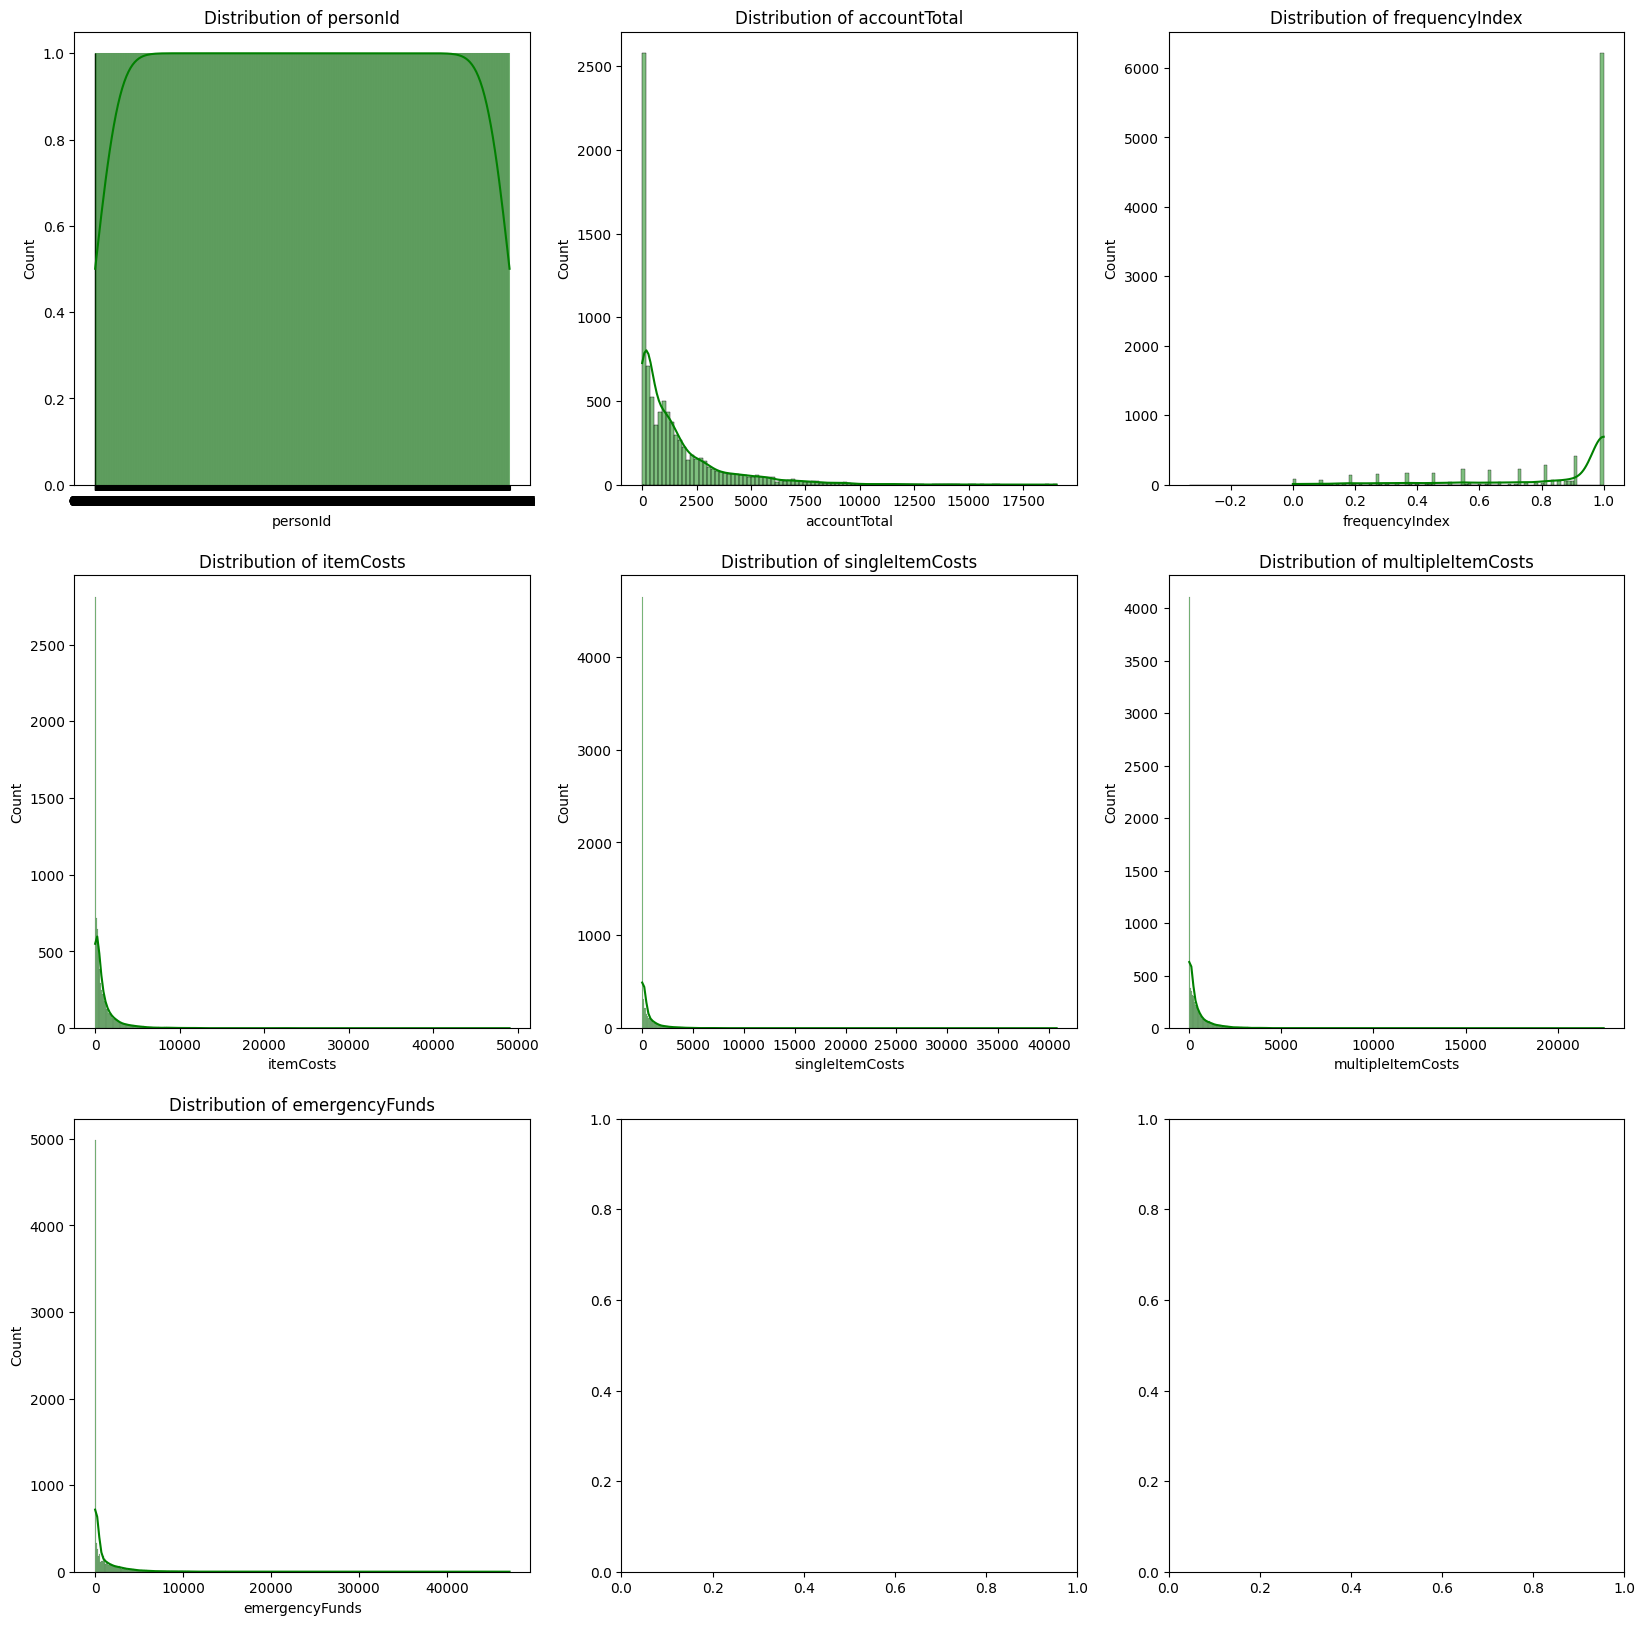

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

missing_maxSpendLimit_rows = shopeasy_df[shopeasy_df['maxSpendLimit'].isnull()]
selected_columns = ['personId', 'accountTotal', 'frequencyIndex','itemCosts','singleItemCosts','multipleItemCosts', 'emergencyFunds']

fig,axes= plt.subplots(3,3, figsize=(20,20))

# Plot distribution plots for each selected column
for i, column in enumerate(selected_columns):
    sns.histplot(data=missing_maxSpendLimit_rows, x=column, ax=axes[i//3, i%3], kde=True, color='purple')
    sns.histplot(data=shopeasy_df, x=column, ax=axes[i//3, i%3], kde=True, color='green')
    axes[i//3, i%3].set_title(f"Distribution of {column}")
    
plt.tight_layout

plt.show()

## Impute the Data

In [132]:
from sklearn.impute import SimpleImputer

#impute missing 'leastAmountPaid' values using SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
shopeasy_df_imputed = shopeasy_df.copy()
shopeasy_df_imputed['maxSpendLimit'] = imputer.fit_transform(shopeasy_df_imputed[['maxSpendLimit']])

# Check the number of missing values after imputation
missing_values_after_imputation = shopeasy_df_imputed['maxSpendLimit'].isnull().sum()

# Print the number of missing values after imputation
print(f"Number of Missing Values after Imputation: {missing_values_after_imputation}")



Number of Missing Values after Imputation: 0


## 3. Visualizing Distribution

Use graphical methods to examine the spread of each variable in the dataset. Techniques such as histograms, kernel density estimations, and box plots are effective in uncovering the underlying distribution and central characteristics of the data.

For numerical values it is more useful to use histograms, while for categorical variables we may want to use bar plots

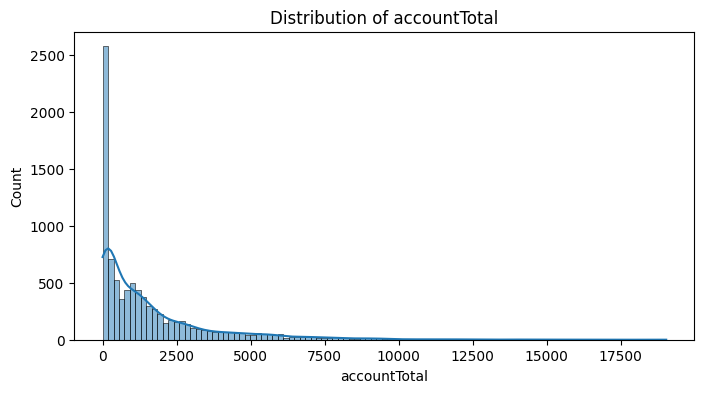

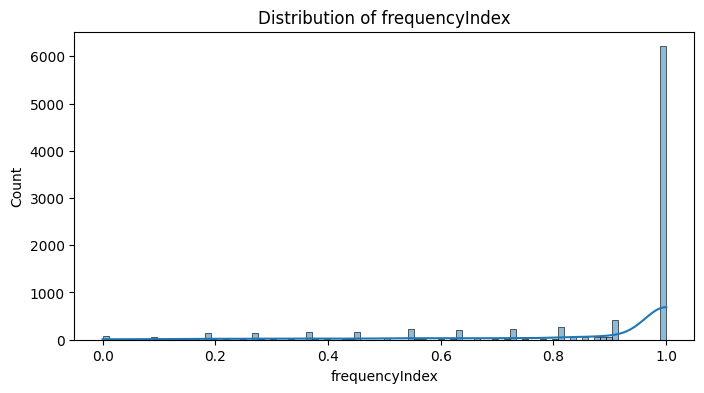

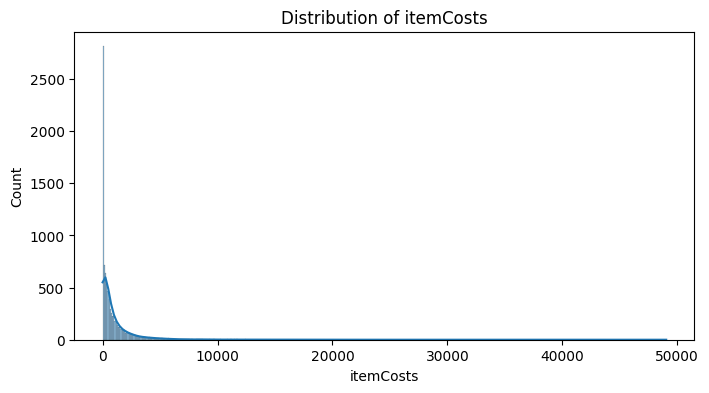

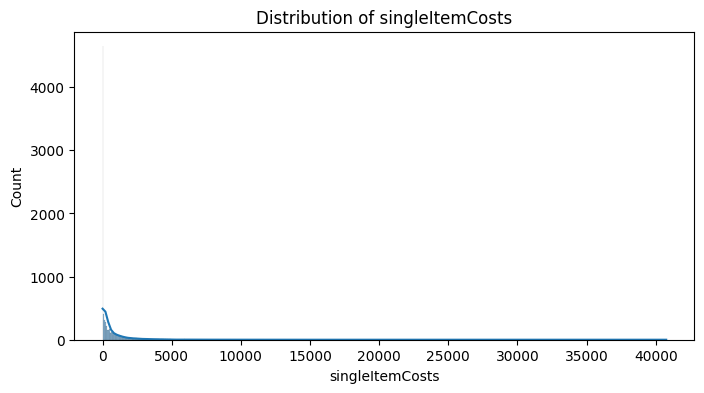

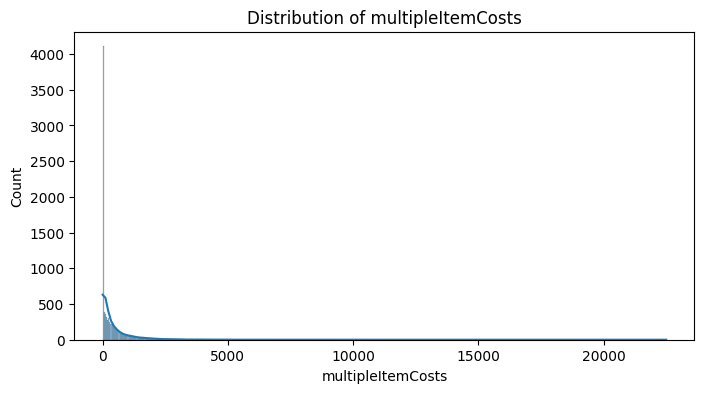

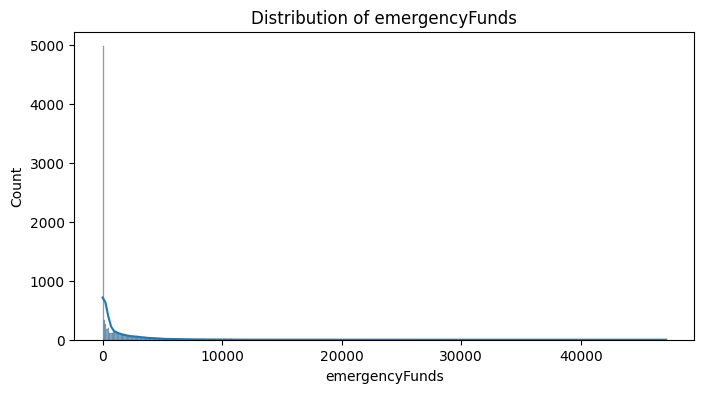

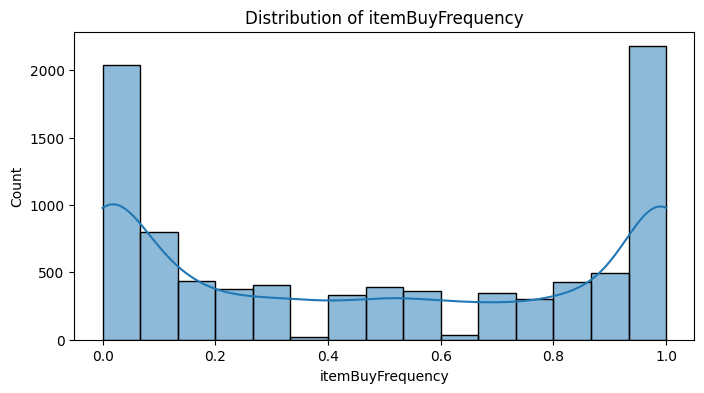

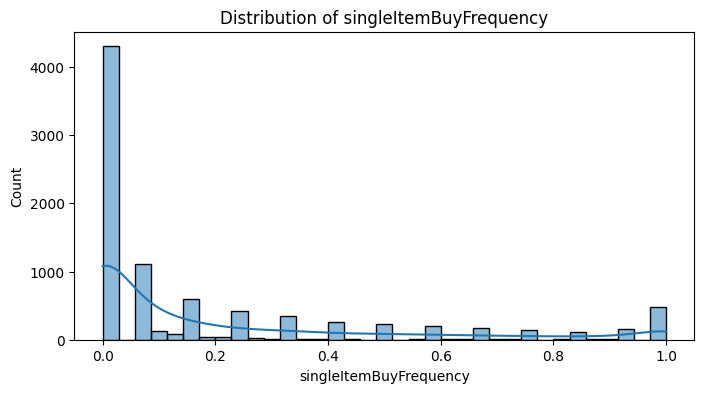

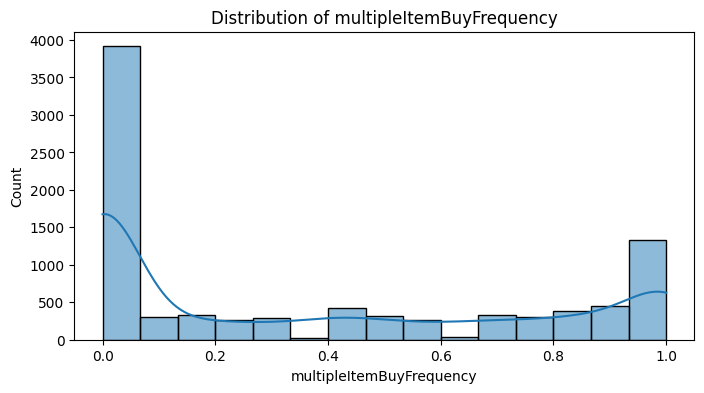

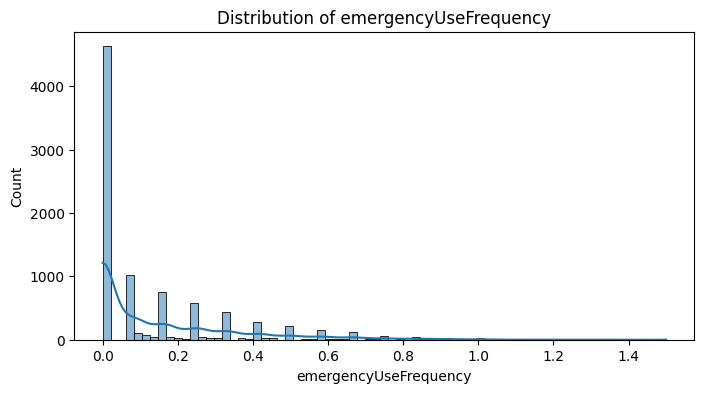

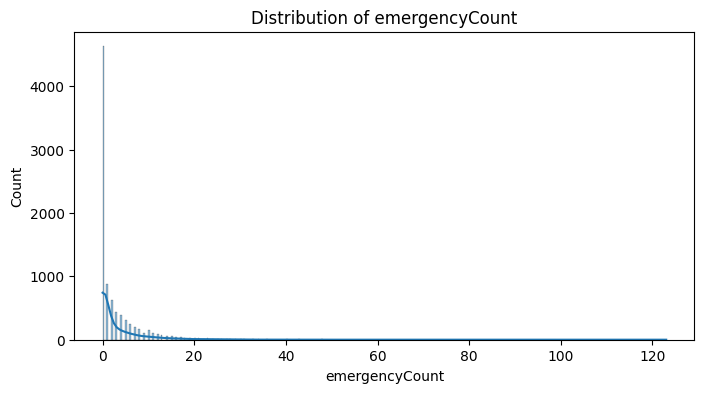

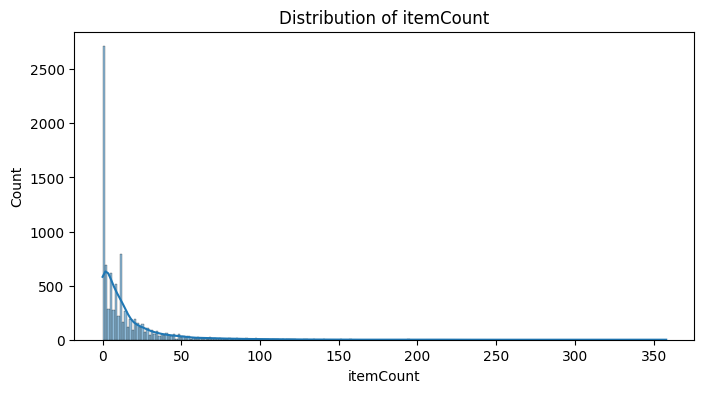

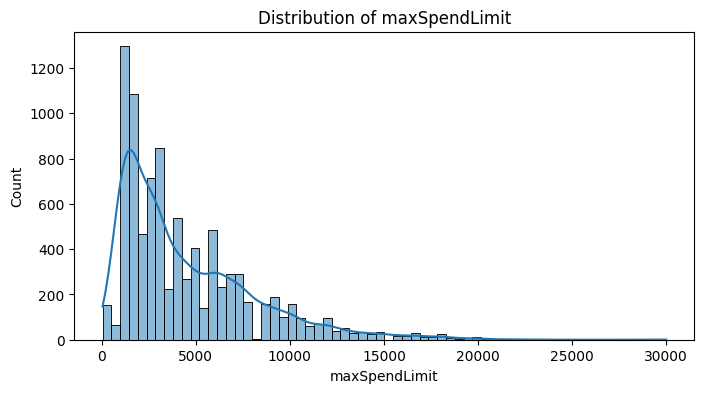

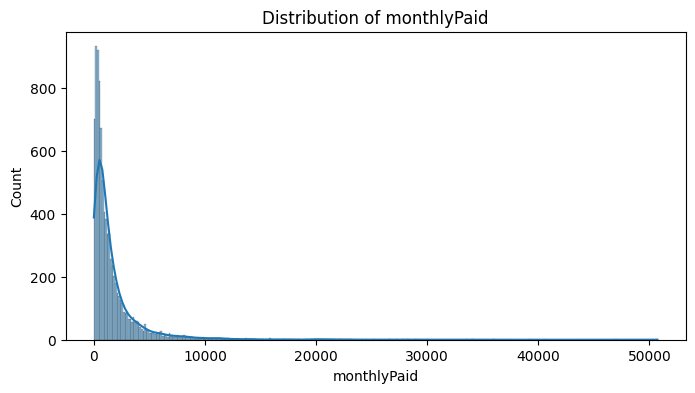

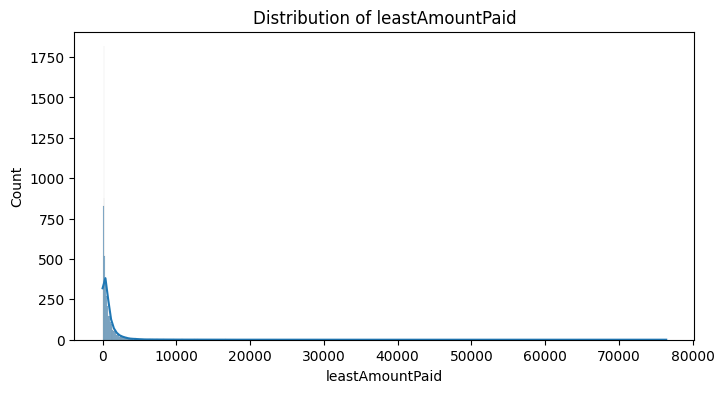

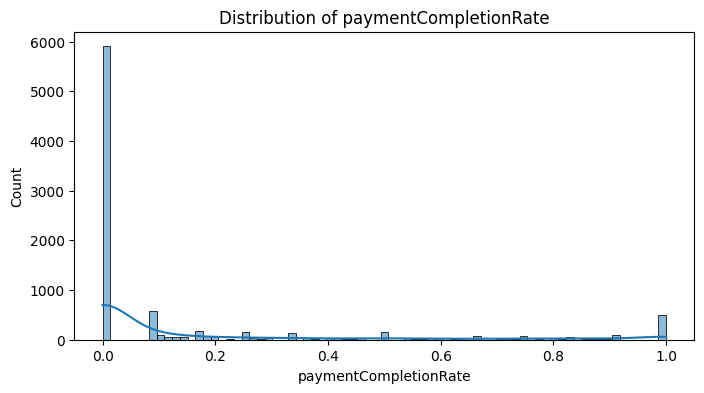

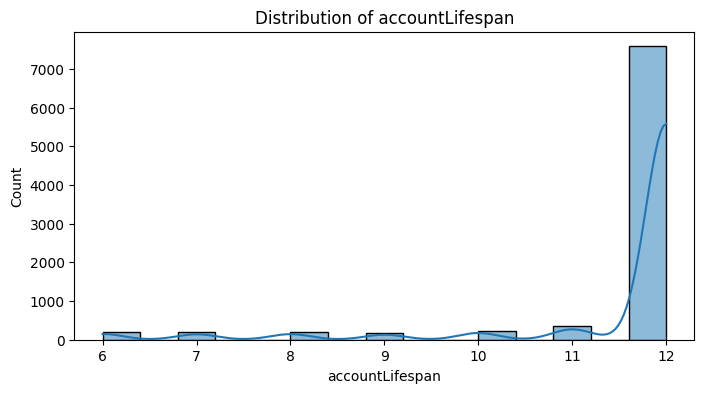

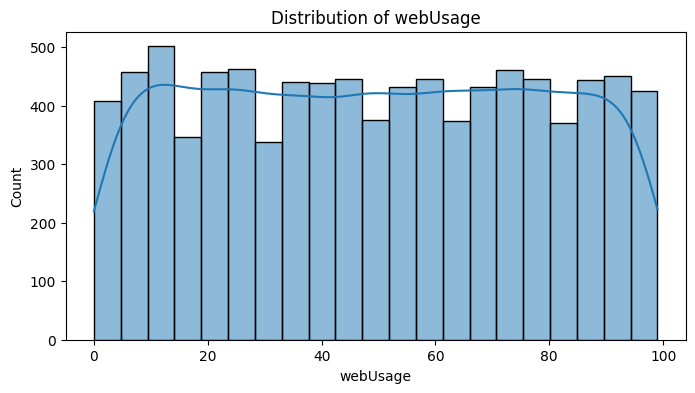

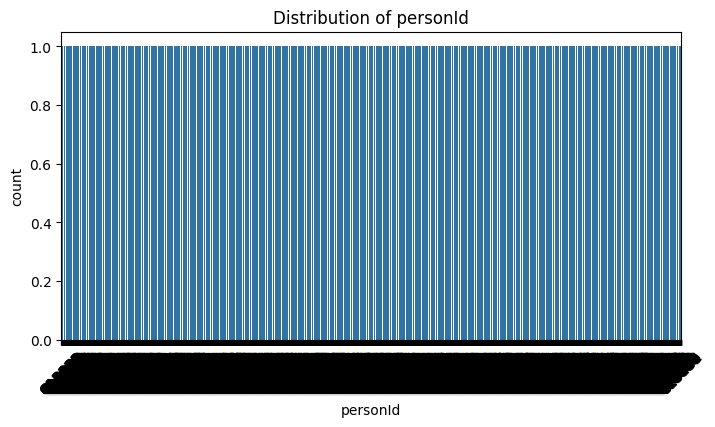

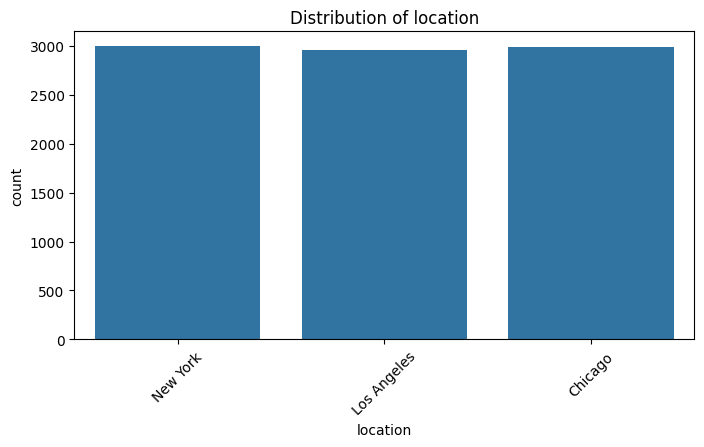

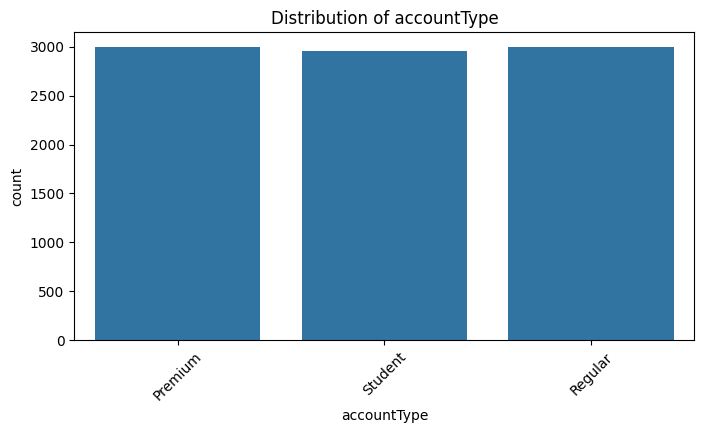

In [133]:
# Histogram for numerical variables
for column in shopeasy_df.select_dtypes(include='number').columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(shopeasy_df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

# Bar plot for categorical variables
for column in shopeasy_df.select_dtypes(include='object').columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=column, data=shopeasy_df)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.show()


We will now try to make box plots using FacetGrid

The **FacetGrid** in Seaborn allows you to create a grid of subplots based on one or more categorical variables. Each subplot represents a subset of your data, making it an excellent choice for visualizing relationships between multiple variables or factors.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


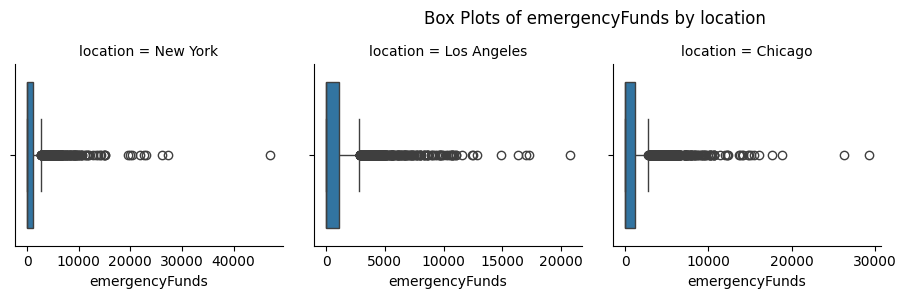

In [134]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numerical_column = 'emergencyFunds'
categorical_column = 'location'

# Create a FacetGrid with box plots
g = sns.FacetGrid(shopeasy_df, col=categorical_column, col_wrap=4, sharex=False, sharey=False)
g.map(sns.boxplot, numerical_column)

# Adjust the layout and show the plots
plt.subplots_adjust(top=0.8)
g.fig.suptitle(f'Box Plots of {numerical_column} by {categorical_column}')
plt.show()


## 4 - Pair Plots for Relationships
Create pair plots to visualize relationships between pairs of variables.

This Pair Plot represents the first five numerical columns of our dataset. 

This visualization provides an overview of the relationships and distributions among these selected variables.

Each plot in the matrix represents the relationship between a pair of variables. The diagonal shows the distribution of each variable, typically visualized as a histogram or kernel density estimate. The off-diagonal plots are scatter plots representing the relationships between pairs of variables, which can help identify correlations, trends, and potential outliers.

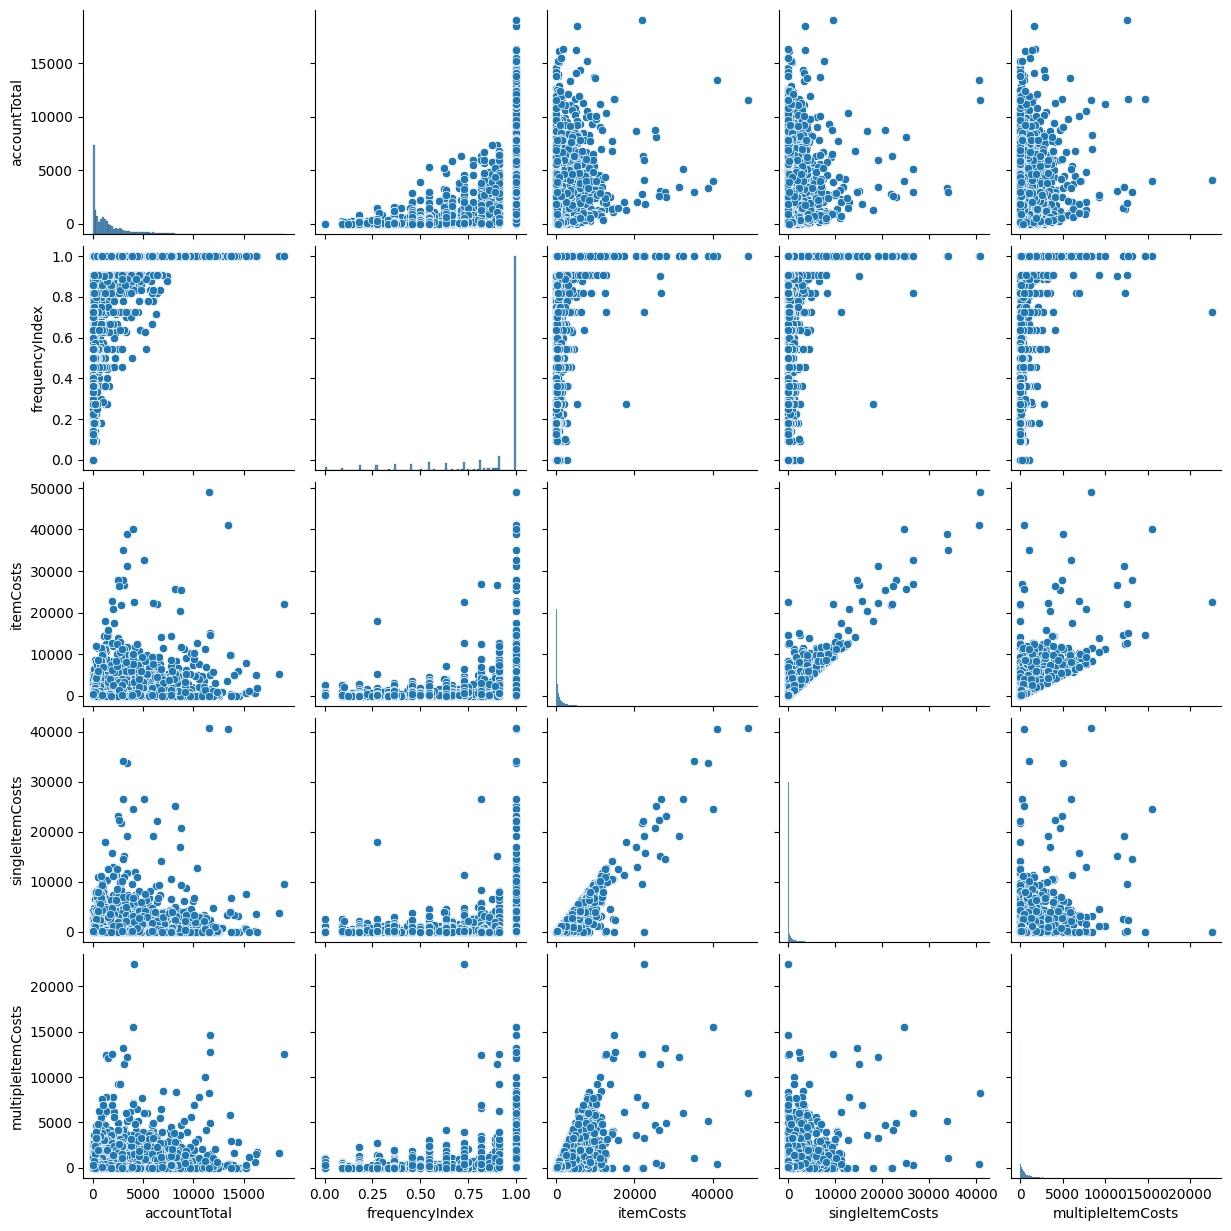

In [135]:
# Typically, pair plots are more meaningful when limited to a few relevant numerical columns
# For demonstration, let's select the first 5 numerical columns
numerical_columns = shopeasy_df.select_dtypes(include=['float64', 'int64']).columns
selected_columns = numerical_columns[:5]

# Creating pair plots for the selected columns
sns.pairplot(shopeasy_df[selected_columns])
plt.show()


There are many other ways to represent our dataset. For example we can find:

**Countplots**

Countplots in Seaborn are used to visualize the frequency of categorical data by displaying the number of occurrences of each category as bars in a bar chart. They are particularly useful for understanding the distribution of categorical variables and spotting any imbalances. Countplots can help identify the most common categories and detect rare or infrequent ones in a dataset.

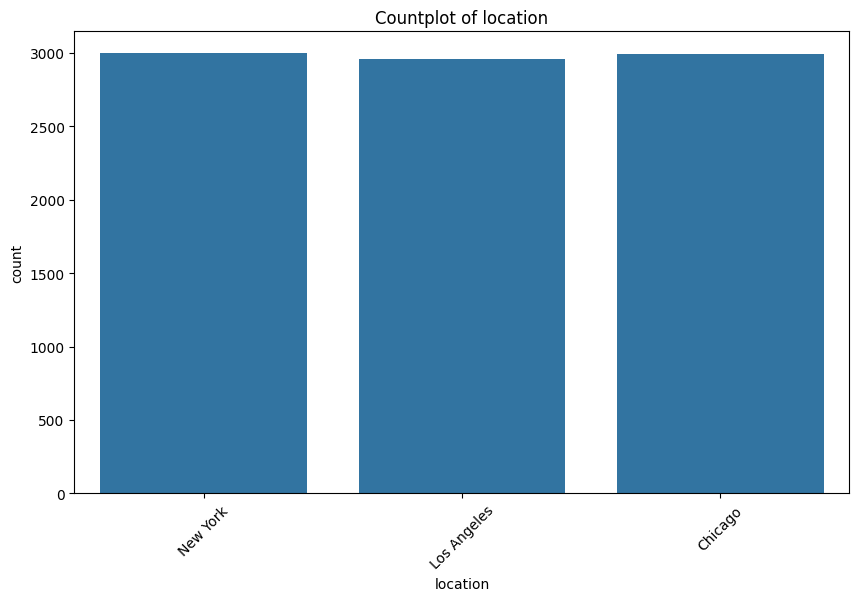

In [136]:
# Creating a countplot for a specific categorical column
categorical_column = 'location'  
plt.figure(figsize=(10, 6))
sns.countplot(x=categorical_column, data=shopeasy_df)
plt.title(f'Countplot of {categorical_column}')
plt.xticks(rotation=45)
plt.show()


**Heatmap**

A heatmap in Seaborn is a graphical representation of a 2D dataset where individual values are represented as colors in a grid. Heatmaps are particularly useful for visualizing relationships and patterns within complex datasets.

In a typical heatmap, the values of the dataset are mapped to a color scale, where higher values are represented by a different color than lower values. This allows you to quickly identify patterns, trends, and correlations within the data.

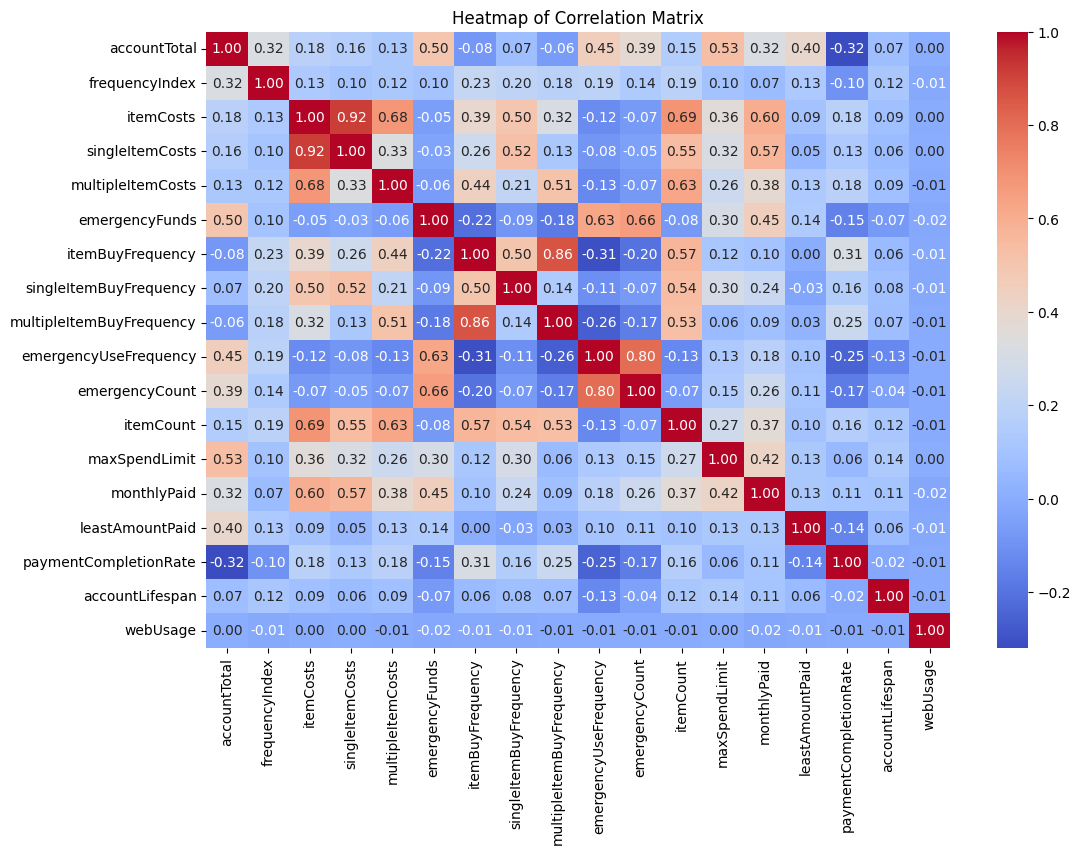

In [137]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Select only numeric columns for correlation matrix, excluding non-numeric columns
numeric_df = shopeasy_df.select_dtypes(include=[np.number])

# Calculating the correlation matrix
correlation_matrix = numeric_df.corr()

# Creating a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlation Matrix')
plt.show()


**Histplot**
Histplot is a Seaborn function used for creating histograms, which provide a graphical representation of the distribution of a single numerical variable. It helps you understand the frequency or density of data points within specified bins or intervals.


Here there is an histogram for the 'accountTotal' column. 
This plot shows the distribution of values within this column, with the kernel density estimation (KDE) providing a smooth estimate of the distribution. The x-axis represents the 'accountTotal' values, and the y-axis shows their frequency.

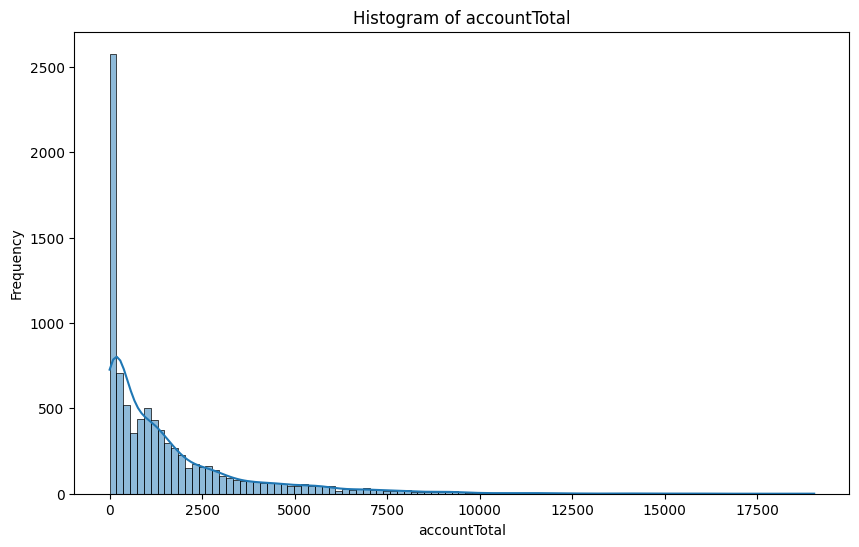

In [138]:
numerical_column = 'accountTotal'  # Replace with an actual numerical column name from your dataset

# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(shopeasy_df[numerical_column], kde=True)
plt.title(f'Histogram of {numerical_column}')
plt.xlabel(numerical_column)
plt.ylabel('Frequency')
plt.show()

**Scatterplot**
A scatterplot in Seaborn is a graphical representation that displays individual data points as markers in a two-dimensional coordinate system. It is used to visualize the relationship between two numerical variables and assess their patterns and correlations.

Here's a scatter plot representing the relationship between 'accountTotal' and 'frequencyIndex' from the ShopEasy dataset. This plot can help visualize any potential correlation or pattern between the total amount spent by users and the frequency of their shopping activities. 

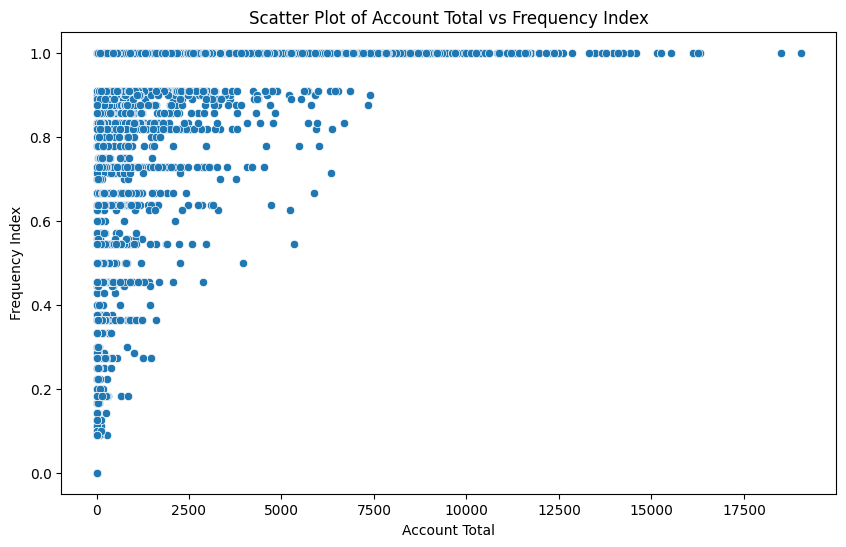

In [139]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='accountTotal', y='frequencyIndex', data=shopeasy_df)
plt.title('Scatter Plot of Account Total vs Frequency Index')
plt.xlabel('Account Total')
plt.ylabel('Frequency Index')
plt.show()


**Jointplot**
A jointplot in Seaborn is a versatile visualization that combines several graphical representations to help analyze the relationship between two numerical variables. It provides a comprehensive view of the data by including scatterplots, histograms, kernel density estimates (KDE), and correlation coefficients.

Here's a joint plot showing the relationship between 'accountTotal' and 'frequencyIndex' from the dataset. The scatter plot in the center illustrates the distribution of data points across these two variables, while the histograms on the top and right margins show the distribution of each variable separately. This visualization can help in understanding how these two aspects of customer behavior might be related.

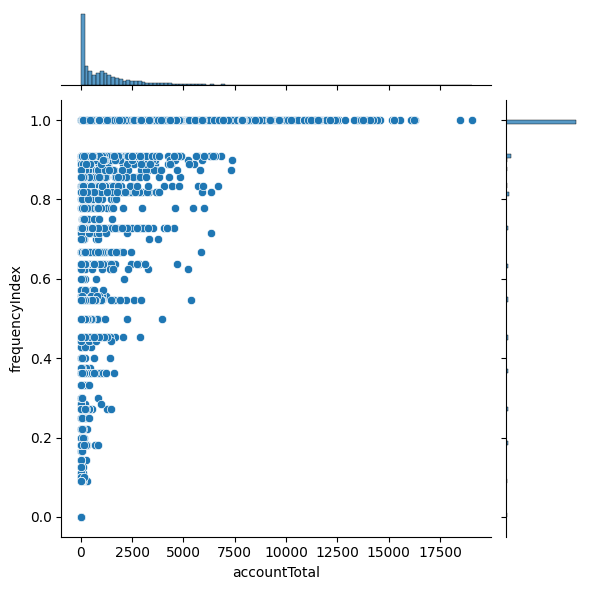

In [140]:
# For a jointplot, we need to select two numerical columns
# Let's select 'accountTotal' and 'frequencyIndex' as an example

# Creating a jointplot
sns.jointplot(x='accountTotal', y='frequencyIndex', data=shopeasy_df, kind='scatter')

# Display the plot
plt.show()


## **2 - Preprocess the dataset**
(Remove duplicates, encode categorical features with one hot encoding)

**Removing duplicates**

To remove duplicates, we identify which columns should be considered for determining duplicates. What we did, other than deleting duplicates, we also created a new csv file in the same directory as the original file containing the data with duplicates removed. 

In [141]:
file_path = 'shopEasy.csv'
shopeasy_df = pd.read_csv(file_path)

# Remove duplicates
shopeasy_df_no_duplicates = shopeasy_df.drop_duplicates()

# Save the dataframe without duplicates
output_file_path = 'shopEasy_no_duplicates.csv'
shopeasy_df_no_duplicates.to_csv(output_file_path, index=False)

print(f"File saved without duplicates at: {output_file_path}")


File saved without duplicates at: shopEasy_no_duplicates.csv


We actually want to know if there are duplicates. Our output shows that there are no duplicates in our dataset

In [142]:
# Finding duplicate rows in the dataframe
duplicates = shopeasy_df[shopeasy_df.duplicated(keep=False)]

# Displaying the duplicate rows, if any
duplicates


,personId,accountTotal,frequencyIndex,itemCosts,singleItemCosts,multipleItemCosts,emergencyFunds,itemBuyFrequency,singleItemBuyFrequency,multipleItemBuyFrequency,...,emergencyCount,itemCount,maxSpendLimit,monthlyPaid,leastAmountPaid,paymentCompletionRate,accountLifespan,location,accountType,webUsage


**Encoding categorical features with one hot encoding**

For machine learning algorithms to process categorical data like text or names of countries, these features must be converted into numeric forms. Scikit-learn offers various encoders for this purpose, including the OneHotEncoder, which is specifically designed to handle categorical features. This involves creating a new binary variable for each category.

In our case the categorical variables are: personId, location and accountType

We first do it for personId

In [143]:
from sklearn.preprocessing import OneHotEncoder

print("Before")
print(shopeasy_df['personId'][:5])
# One Hot Encoder
encoder = OneHotEncoder()
col_out = encoder.fit_transform(shopeasy_df[['personId']])

print("After")
print(col_out[:5])

Before
0    C10573
1    C16889
2    C12964
3    C11171
4    C17582
Name: personId, dtype: object
After
  (0, 549)	1.0
  (1, 6701)	1.0
  (2, 2880)	1.0
  (3, 1131)	1.0
  (4, 7381)	1.0


We now do it for location

In [144]:
print("Before")
print(shopeasy_df['location'][:5])
# One Hot Encoder
encoder = OneHotEncoder()
col_out = encoder.fit_transform(shopeasy_df[['location']])

print("After")
print(col_out[:5])


Before
0       New York
1    Los Angeles
2       New York
3        Chicago
4       New York
Name: location, dtype: object
After
  (0, 2)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 0)	1.0
  (4, 2)	1.0


And lastly for accountType

In [145]:
print("Before")
print(shopeasy_df['accountType'][:5])
# One Hot Encoder
encoder = OneHotEncoder()
col_out = encoder.fit_transform(shopeasy_df[['accountType']])

print("After")
print(col_out[:5])

Before
0    Premium
1    Premium
2    Student
3    Premium
4    Premium
Name: accountType, dtype: object
After
  (0, 0)	1.0
  (1, 0)	1.0
  (2, 2)	1.0
  (3, 0)	1.0
  (4, 0)	1.0


## 3 - Define whether this is a regression, classification or clustering problem
Explain why and choose your model design accordingly. Test at least 2 different models.

Choosing whether this is a regression, classification or clustering problem depends on what we want to analyze. 

Saying that it is a Regression problem would mean to predict a continuos variable, like for instance predicting 'accountTotal' or 'itemCosts'. Regression is in fact commonly used when the output variable is a real or a continous value

Otherwise if the objective is to predict a categorical variable, like predicting 'accountType' or classifying customers based on their 'location', then it may is a Classification problem.

What we think it's more appropriate is to treat it as a Clustering problem. As a matter of fact we use clustering to group the data into clusters based on similarities among the features without any predefined labels. Clustering is a type of unsupervised learning used when the output is not known and the model tries to identify patterns in the data on its own

We will now implement three different clustering algorithms: KMeans, hierarchical clustering and DBSCAN.

## KMeans

We started with the implementation of kmeans using the elbow method to find out the optimal number of clusters .
From the output we saw that the elbow point is at 3. 

In [146]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt

file_path = 'shopEasy.csv'
data = pd.read_csv(file_path)

# Identify numerical columns for clustering
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing: Handling missing values and scaling features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Applying preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_cols)
])

# Preprocess the data
X = preprocessor.fit_transform(data[numerical_cols])


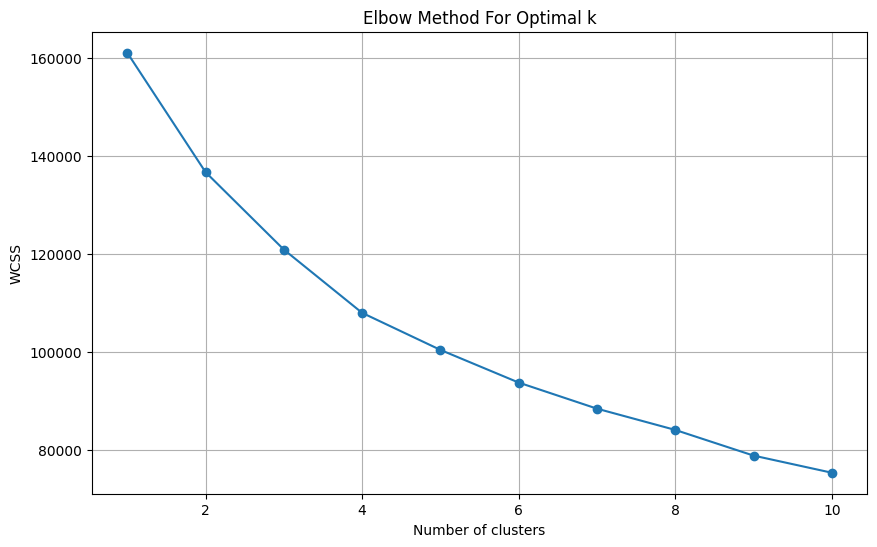

In [147]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Apply the Elbow Method to find the optimal number of clusters
# We will calculate the Within-Cluster Sum of Squares (WCSS) for a range of cluster numbers
wcss = []
for i in range(1, 11):  # Trying from 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the results onto a line graph to observe the 'elbow'
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  
plt.grid(True)
plt.show()


We now proceed with testing the KMeans algorithm with 3 clusters

There are three distinct clusters represented by different colors. The black dots represent the centroids of each cluster, which are the average positions of all the points in each cluster. 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


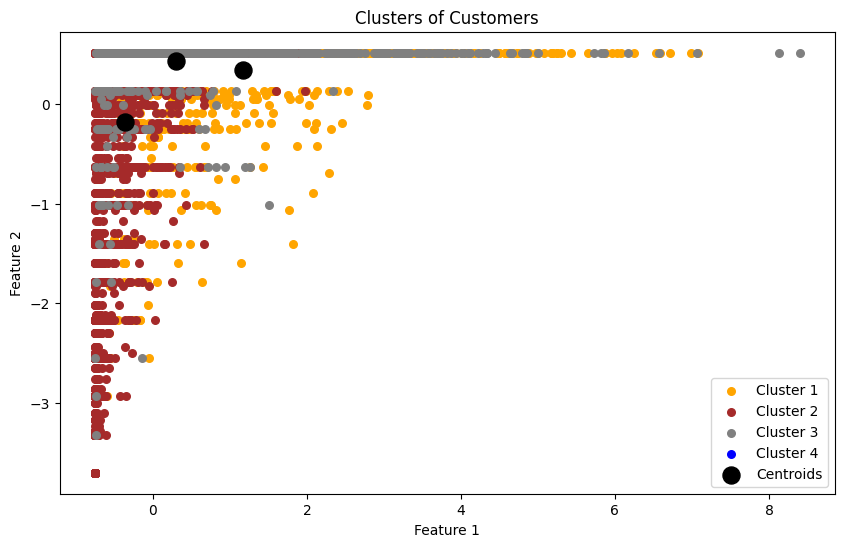

In [148]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming X is your preprocessed dataset
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
km_clusters = kmeans.fit_predict(X)

# Choose two features for visualization. Here we use the first two features.
feature_1 = X[:, 0]
feature_2 = X[:, 1]

# Visualize the clusters
plt.figure(figsize=(10, 6))
colors = ['orange', 'brown', 'gray', 'blue']
labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

for i, color, label in zip(range(4), colors, labels):
    plt.scatter(feature_1[km_clusters == i], feature_2[km_clusters == i], s=30, c=color, label=label)

# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=150, c='black', label='Centroids')

plt.title('Clusters of Customers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


To better understand our models and confront it we will compute two evaluation metrics 
- Silhouette coefficient
- Calinski-Harabasz index
- Davies Bouldin index

In [149]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

In [150]:
silhouette_avg = silhouette_score(X, kmeans.labels_)
calinski_score = calinski_harabasz_score(X, kmeans.labels_)
davies_bouldin_score= davies_bouldin_score(X, kmeans.labels_)
print('Silhouette Index: %.3f' % silhouette_avg)
print('Calinski-Harabasz Index: %.3f' % calinski_score)
print('Davies Bouldin Index: %.3f' % davies_bouldin_score)

Silhouette Index: 0.231
Calinski-Harabasz Index: 1485.760
Davies Bouldin Index: 1.682


## Hierarchical Clustering ##

As we did before, also for the hierarchical clustering, we need to find the optimal number of clusters. To do so we plotted a dendogram and from the output we can see that the optimal number of clusters is 4

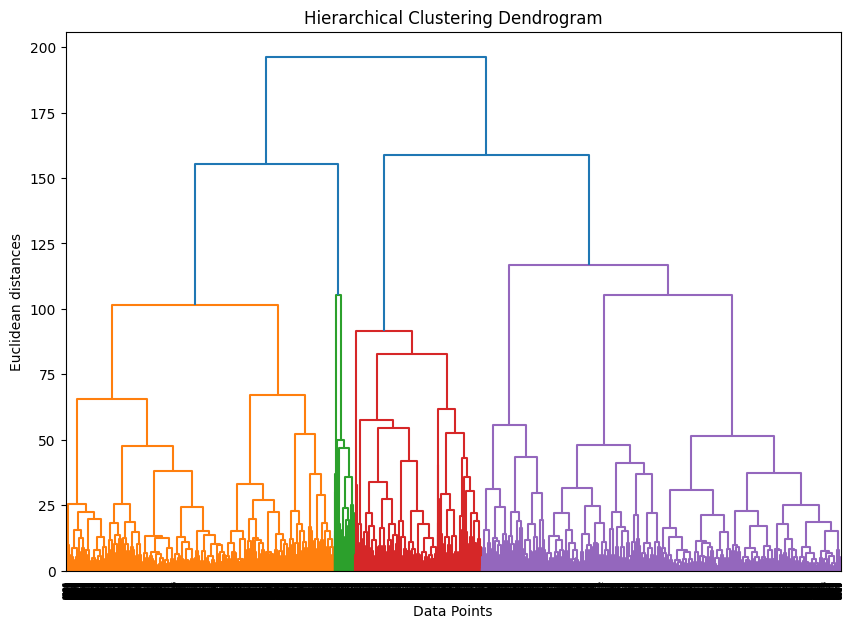

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

# Load the dataset
file_path = 'shopEasy.csv'
data = pd.read_csv(file_path)

# Select a subset of numerical columns for clustering to simplify the example
# Typically, you would need to preprocess the data more thoroughly
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
data_subset = data[numerical_cols].dropna()

# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_subset)

# Create a dendrogram
plt.figure(figsize=(10, 7))
plt.title("Hierarchical Clustering Dendrogram")
dendrogram = sch.dendrogram(sch.linkage(data_scaled, method='ward'))
plt.xlabel("Data Points")
plt.ylabel("Euclidean distances")
plt.show()


We now perform the fitting of the Hierarchical Clustering model given that we have 3 as the optimal number of clusters

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


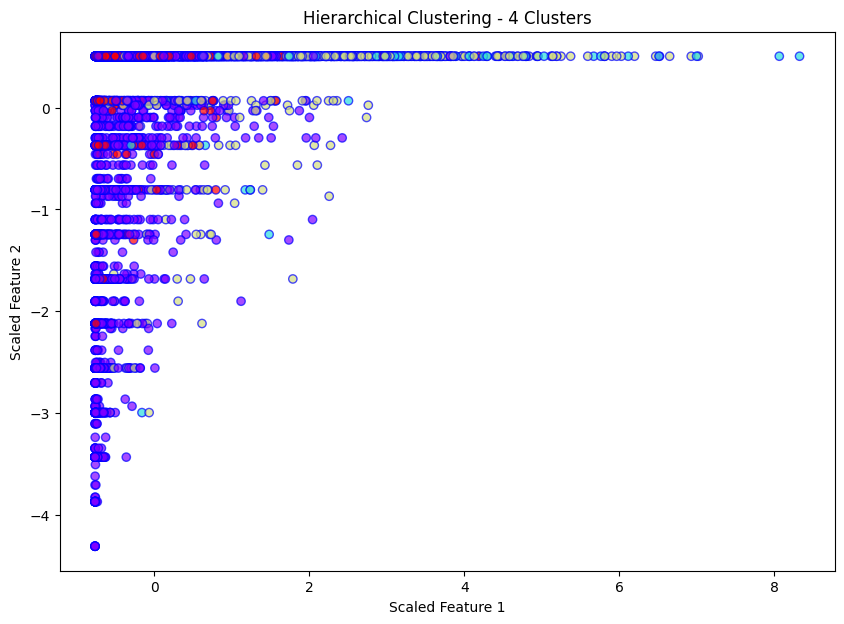

In [152]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

# Load the dataset
data = pd.read_csv('shopEasy.csv')  

# Preprocess the data: Select numerical columns and scale the data
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
data_subset = data[numerical_cols].dropna()

# Scaling the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_subset)

# Hierarchical Clustering: Perform the clustering with 4 clusters on scaled data
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
hc_clusters = hc.fit_predict(data_scaled)

# Visualize the clusters
plt.figure(figsize=(10, 7))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=hc_clusters, cmap='rainbow', alpha=0.7, edgecolors='b')
plt.title('Hierarchical Clustering - 4 Clusters')
plt.xlabel('Scaled Feature 1')
plt.ylabel('Scaled Feature 2')
plt.show()



We now compute the same 3 evaluation metrics

In [154]:
# Silhouette Coefficient
silhouette_avg = silhouette_score(data_scaled, hc_clusters)

# Calinski-Harabasz Index
calinski_harabasz_avg = calinski_harabasz_score(data_scaled, hc_clusters)

# Davies-Bouldin Index
davies_bouldin_avg = davies_bouldin_score(data_scaled, hc_clusters)

print('Silhouette Index: %.3f' % silhouette_avg)
print('Calinski-Harabasz Index: %.3f' % calinski_harabasz_avg)
print('Devis Bouldin Index: %.3f' % davies_bouldin_avg)


TypeError: 'numpy.float64' object is not callable

## DBSCAN ##

In this case DBSCAN won't need any help to figure out the optimal number of clusters. This is the ideal method if you want to deal with outliners an non-linearity. 

DBSCAN operates on the principle that a cluster comprises a minimum number of points that are densely packed together. The functionality of this model is governed by two key parameters:

- Epsilon: This parameter sets the maximum distance between two points for them to be considered as part of the same neighborhood.
- Minimum Samples: This defines the minimum number of close neighbors that a point must have to qualify as a core point, with the point itself being counted within this minimum number.

Minimum sample (n): 36


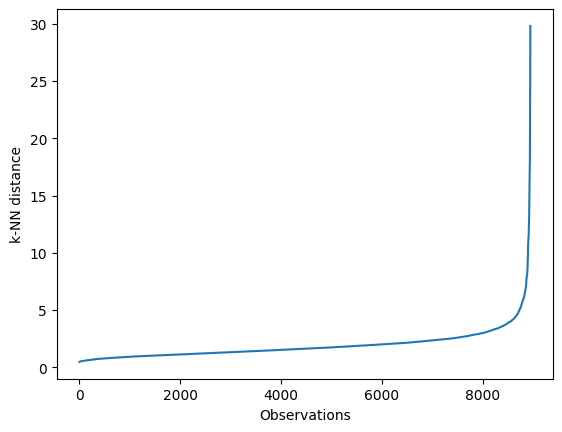

In [155]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('shopEasy.csv')

# Impute missing values for numerical data
numeric_data = data.select_dtypes(include=[np.number])
imputer = SimpleImputer(strategy='mean')
numeric_data_imputed = imputer.fit_transform(numeric_data)

# Standardize the data
scaler = StandardScaler()
data_std = scaler.fit_transform(numeric_data_imputed)
data_std_df = pd.DataFrame(data_std, columns=numeric_data.columns)

# Finding 'n' (Minimum Sample Size)
min_sample = 2 * len(data_std_df.columns)
print(f"Minimum sample (n): {min_sample}")

# Finding Epsilon and k Neighbors
nbrs = NearestNeighbors(n_neighbors=min_sample + 1).fit(data_std_df)
neigh_dist, neigh_ind = nbrs.kneighbors(data_std_df)

# Sorting and Plotting for Epsilon Determination
sort_neigh_dist = np.sort(neigh_dist, axis=0)
k_dist = sort_neigh_dist[:, min_sample]
plt.plot(k_dist)
plt.ylabel("k-NN distance")
plt.xlabel("Observations")
plt.show()


Also in this case we fit the model.

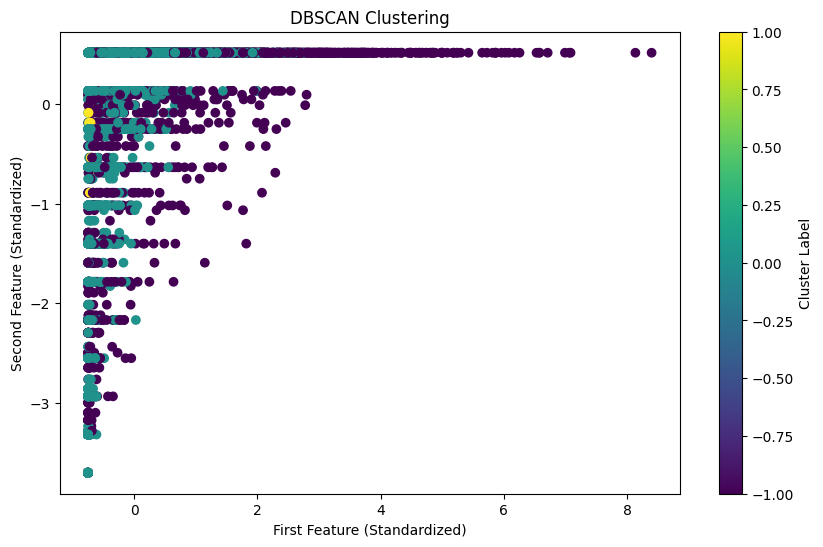

In [156]:
from sklearn.cluster import DBSCAN

# Assuming the previously calculated epsilon and minimum samples
epsilon = np.median(k_dist)  
min_samples = min_sample  

# Creating the DBSCAN model
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
clusters = dbscan.fit_predict(data_std_df)

#plot the graph
plt.figure(figsize=(10, 6))
plt.scatter(data_std_df.iloc[:, 0], data_std_df.iloc[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title('DBSCAN Clustering')
plt.xlabel('First Feature (Standardized)')
plt.ylabel('Second Feature (Standardized)')
plt.colorbar(label='Cluster Label')
plt.show()

Lastly we compute the evaluation metrics

In [157]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Calculating the Silhouette coefficient
filtered_labels = clusters[clusters != -1]
filtered_data = data_std_df.iloc[clusters != -1, :]

# Computing the Silhouette coefficient, Calinski-Harabasz index, and Davies-Bouldin index
if len(set(filtered_labels)) > 1:
    silhouette_coef = silhouette_score(filtered_data, filtered_labels)
    calinski_harabasz = calinski_harabasz_score(filtered_data, filtered_labels)
    davies_bouldin = davies_bouldin_score(filtered_data, filtered_labels)
else:
    silhouette_coef = "Undefined - Only one cluster present"
    calinski_harabasz = "Undefined - Only one cluster present"
    davies_bouldin = "Undefined - Only one cluster present"


print('Silhouette Index: %.3f' % silhouette_coef)
print('Calinski-Harabasz Index: %.3f' % calinski_harabasz)
print('Devis Bouldin Index: %.3f' % davies_bouldin)



Silhouette Index: 0.251
Calinski-Harabasz Index: 97.597
Devis Bouldin Index: 0.959


Comparing the previous values with this one, we can say that:
- Silhouette Index: DBSCAN has the highest Silhouette Index (0.251), suggesting that it has the best-defined clusters compared to the other models.
- Calinski-Harabasz Index: K-means has the highest score (1485.760), indicating better cluster separation compared to the other models.
- Davies-Bouldin Index: DBSCAN has the lowest score (0.959), implying the best clustering in terms of separation and compactness.

We then can say that DBSCAN seems preferable. 

## 4 - Identify the proper number of segments, and evaluate different options

Since DBSCAN is our best model we proceed with the segmentation of the databases. 

The segmentation strategies may focus on factors like spending habits, frequency of purchases, types of purchases and geographical location.

Let's first perform segmentation based on spending habits 

In [158]:
file_path = 'shopEasy.csv'
data = pd.read_csv(file_path)

# Select columns related to spending habits and fill missing values
spending_data = data[['accountTotal', 'itemCosts', 'singleItemCosts', 'multipleItemCosts', 'maxSpendLimit']].fillna(0)

# Perform K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(spending_data)

# Add cluster labels to the original dataframe
data_with_clusters = data.copy()
data_with_clusters['SpendingHabitCluster'] = cluster_labels

# Function to summarize each cluster for numeric columns
def summarize_clusters(data_frame, cluster_column):
    numeric_cols = data_frame.select_dtypes(include=[float, int]).columns
    cluster_summary = data_frame[numeric_cols].groupby(cluster_column).mean()
    cluster_summary['Count'] = data_frame[cluster_column].value_counts()
    return cluster_summary

# Summarizing the clusters
cluster_summary = summarize_clusters(data_with_clusters, 'SpendingHabitCluster')
cluster_summary


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,accountTotal,frequencyIndex,itemCosts,singleItemCosts,multipleItemCosts,emergencyFunds,itemBuyFrequency,singleItemBuyFrequency,multipleItemBuyFrequency,emergencyUseFrequency,emergencyCount,itemCount,maxSpendLimit,monthlyPaid,leastAmountPaid,paymentCompletionRate,accountLifespan,webUsage,Count
SpendingHabitCluster,,,,,,,,,,,,,,,,,,,
0,4588.597587,0.982072,12633.697902,9045.211818,3588.486084,910.223838,0.913181,0.775842,0.715024,0.079720,2.265734,102.741259,12256.643357,11492.853292,2109.447840,0.335797,11.909091,51.153846,143
1,3178.844454,0.932480,1349.146380,820.689301,528.760638,2020.452644,0.535177,0.305829,0.378898,0.195037,5.283011,20.126285,8968.247261,2826.174653,1345.038643,0.139214,11.735911,49.585356,2431
2,881.133843,0.853870,610.459475,315.833358,294.931744,583.283261,0.463776,0.150185,0.351061,0.113552,2.495295,10.670326,2614.324555,1097.510802,647.119717,0.155160,11.425188,49.321675,6376


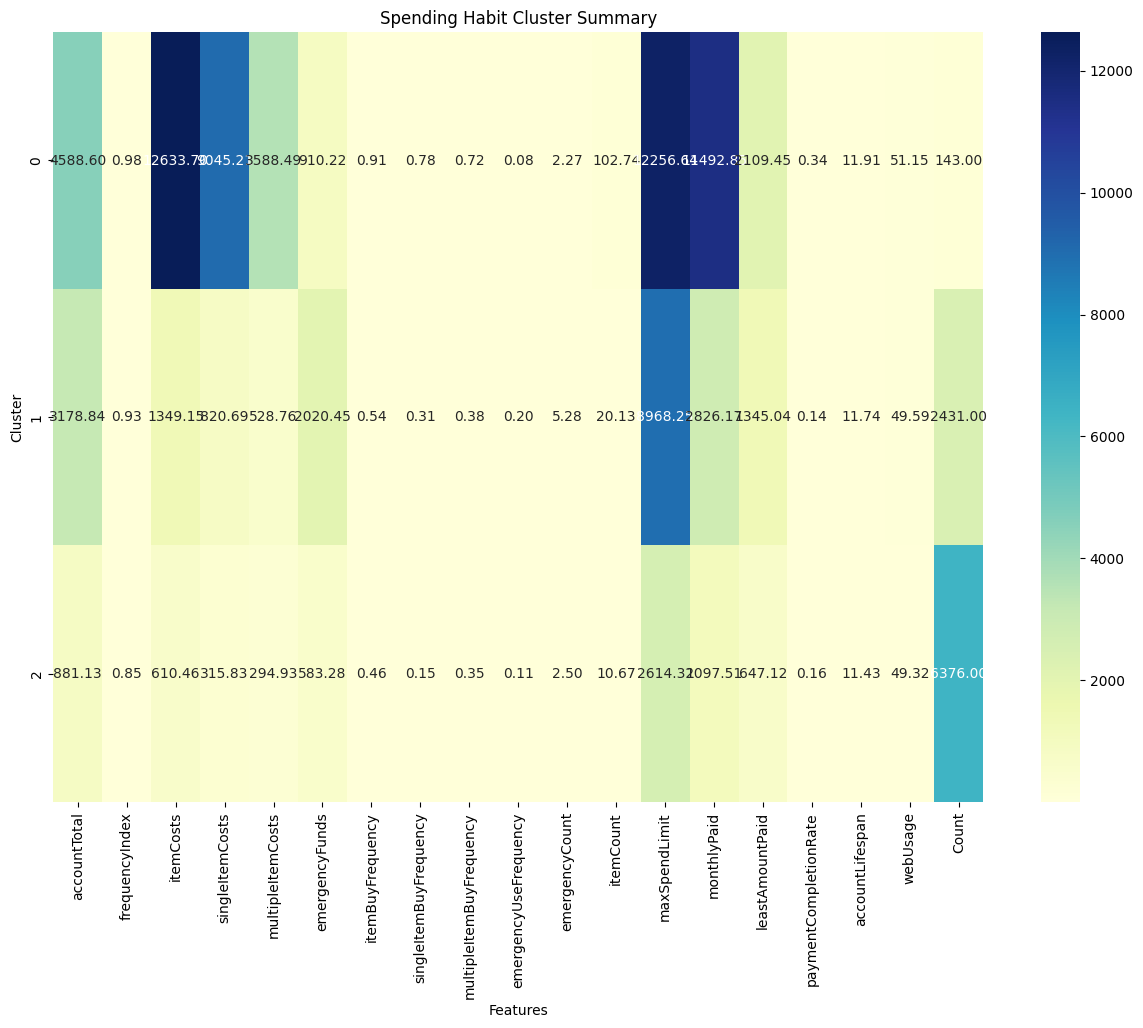

In [159]:
plt.figure(figsize=(15, 10))
sns.heatmap(cluster_summary, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Spending Habit Cluster Summary')
plt.ylabel('Cluster')
plt.xlabel('Features')
plt.show()

We now perform segmentation by purchase frequency

In [160]:
file_path = 'shopEasy.csv'
data = pd.read_csv(file_path)

# Selecting relevant columns for segmentation by purchase frequency
purchase_frequency_data = data[['frequencyIndex', 'itemBuyFrequency', 'singleItemBuyFrequency', 'multipleItemBuyFrequency']]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(purchase_frequency_data)

# Performing KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(scaled_data)

# Adding the cluster information to the original data for interpretation
data['PurchaseFrequencyCluster'] = clusters

# Selecting only numeric columns for the group by operation
numeric_cols = data.select_dtypes(include=[int, float])

# Analyzing the clusters with only numeric columns
cluster_analysis_numeric = numeric_cols.groupby('PurchaseFrequencyCluster').mean()
(cluster_analysis_numeric)



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,accountTotal,frequencyIndex,itemCosts,singleItemCosts,multipleItemCosts,emergencyFunds,itemBuyFrequency,singleItemBuyFrequency,multipleItemBuyFrequency,emergencyUseFrequency,emergencyCount,itemCount,maxSpendLimit,monthlyPaid,leastAmountPaid,paymentCompletionRate,accountLifespan,webUsage
PurchaseFrequencyCluster,,,,,,,,,,,,,,,,,,
0,2130.440072,0.966949,321.478576,255.475488,66.234972,1528.115770,0.149929,0.089927,0.058642,0.218533,5.164303,2.957720,4211.391815,1485.355203,1020.933448,0.035481,11.500401,49.677816
1,1511.304611,0.968199,1894.572325,1054.533446,840.435051,617.176355,0.901395,0.359890,0.724050,0.085051,2.162809,29.849675,5021.122880,2128.487651,919.004500,0.241480,11.595319,48.782575
2,167.857406,0.376726,360.151484,214.123882,146.244561,495.091182,0.264978,0.067371,0.189035,0.048145,1.068713,4.260234,3786.861335,1298.852384,181.364011,0.230016,11.344298,50.524123


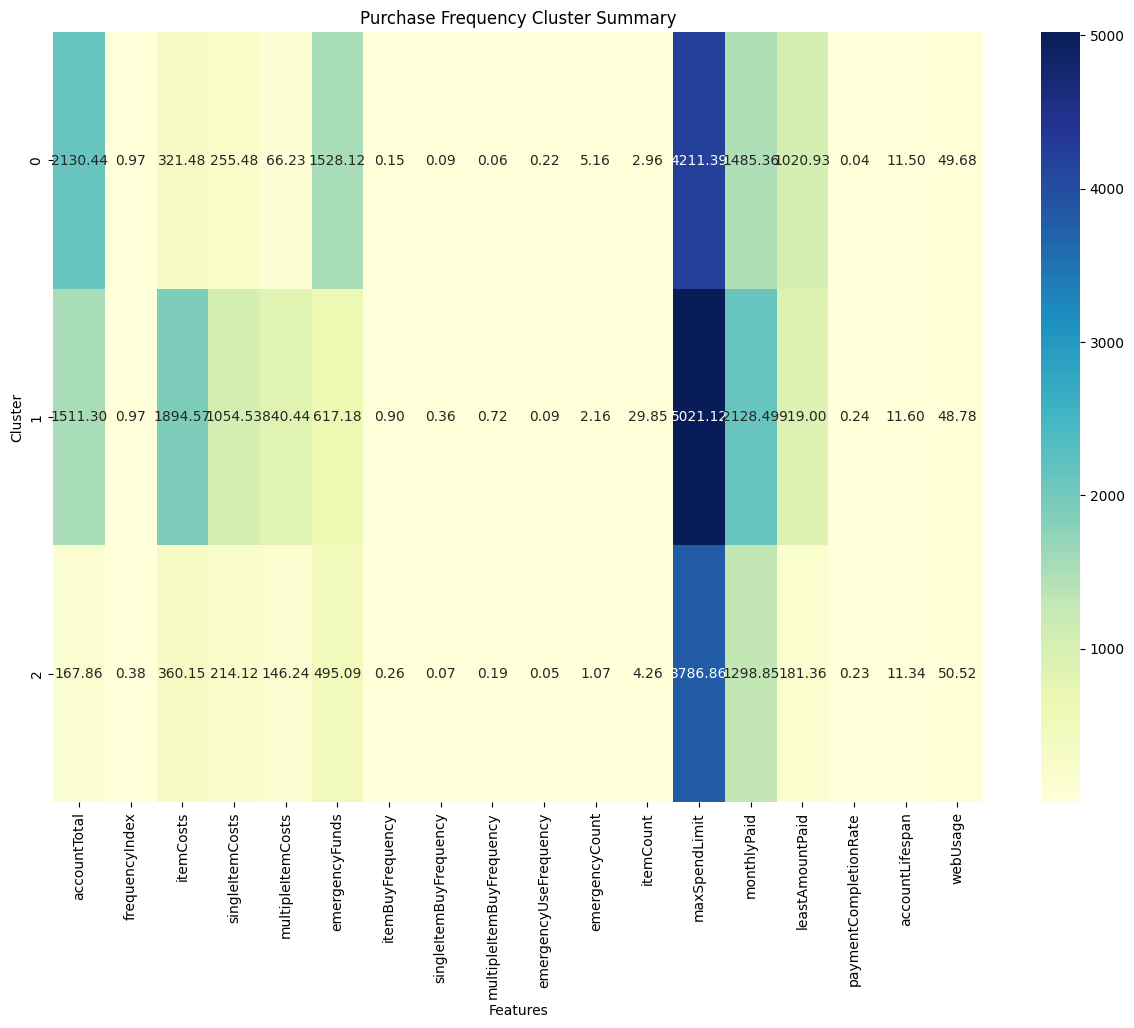

In [161]:
plt.figure(figsize=(15, 10))
sns.heatmap(cluster_analysis_numeric, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Purchase Frequency Cluster Summary')
plt.ylabel('Cluster')
plt.xlabel('Features')
plt.show()

We move to Geographical Segmentation

In [162]:
geo_mean = data.groupby('location')[['itemCosts','accountTotal', 'webUsage', 'itemCount']].mean()
geo_mean.head()

,itemCosts,accountTotal,webUsage,itemCount
location,,,,
Chicago,1024.101083,1585.436414,48.791444,15.326872
Los Angeles,982.545198,1591.009349,49.650456,13.987504
New York,1002.754918,1517.332424,49.827494,14.807474


Text(0, 0.5, 'Location')

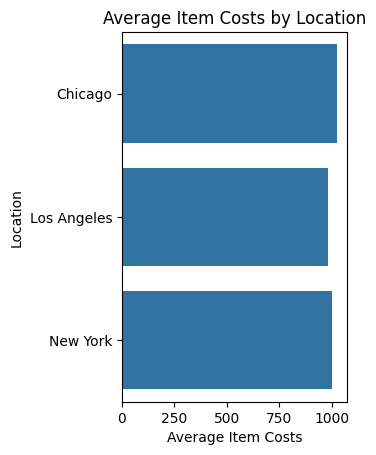

In [163]:
# Plotting 'itemCosts'
plt.subplot(1, 2, 1)
sns.barplot(x=geo_mean['itemCosts'], y=geo_mean.index)
plt.title('Average Item Costs by Location')
plt.xlabel('Average Item Costs')
plt.ylabel('Location')

Text(0, 0.5, 'Location')

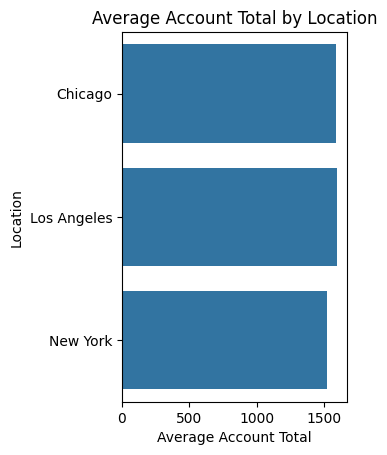

In [164]:
# Plotting 'accountTotal'
plt.subplot(1, 2, 1)
sns.barplot(x=geo_mean['accountTotal'], y=geo_mean.index)
plt.title('Average Account Total by Location')
plt.xlabel('Average Account Total')
plt.ylabel('Location')

Text(0, 0.5, 'Location')

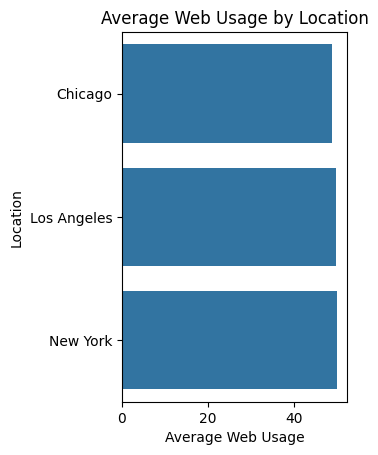

In [165]:
# Plotting 'webUsage'
plt.subplot(1, 2, 2)
sns.barplot(x=geo_mean['webUsage'], y=geo_mean.index)
plt.title('Average Web Usage by Location')
plt.xlabel('Average Web Usage')
plt.ylabel('Location')

Text(0, 0.5, 'Location')

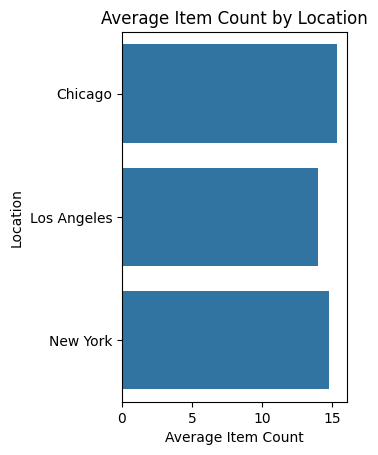

In [166]:
#Plotting 'itemCount'
plt.subplot(1, 2, 2)
sns.barplot(x=geo_mean['itemCount'], y=geo_mean.index)
plt.title('Average Item Count by Location')
plt.xlabel('Average Item Count')
plt.ylabel('Location')

## 5- Describe the properties of the segment you have identified

**1 - Segmentation based on spending habits**

We identify three distinct groups:
- High Spenders (Cluster 0): This smallest group shows significantly high spending across all categories.
- Moderate Spenders (Cluster 1): This group represents customers with moderately high spending habits, but less than the high spenders.
- Low Spenders (Cluster 2): The largest group, consisting of customers with the lowest spending in comparison to the other two groups.

**Cluster 0**: High Spenders
- Quantity: Relatively small group (143 customers).
- Spending Profile:
  - High average account total ($4,588.60) and item costs
    ($12,633.70).
  - Predominant in single item purchases ($9,045.21) compared to 
    multiple item purchases ($3,588.49).
Financial Behavior:
  - Considerable emergency funds ($910.22).
  - High max spend limit ($12,256.64).
  - High monthly payment ($11,492.85) with a relatively higher 
    payment completion rate (33.58%).
- Demographics and Web Usage:
  - Average account lifespan of about 11.91 months.
  - Higher web usage average (51.15).

**Cluster 1**: Moderate Spenders
- Quantity: A substantial segment (2,431 customers).
- Spending Profile:
  - Moderate average account total ($3,178.84) and item costs 
    ($1,349.15).
  - Balanced spending between single ($820.69) and multiple 
   ($528.76) item purchases.
- Financial Behavior:
  - High emergency funds ($2,020.45), possibly indicating a 
    cautious financial approach.
  - Significant max spend limit ($8,968.25).
  - Moderate monthly payment ($2,826.17) with a lower payment 
    completion rate (13.92%).
- Demographics and Web Usage:
  - Similar average account lifespan to other segments (11.74 months).
  - Average web usage (49.59), indicative of moderate online 
    engagement.

**Cluster 2**: Low Spenders
- Quantity: The largest group (6,376 customers).
- Spending Profile:
  - Lowest average account total ($881.13) and item costs 
    ($610.46).
  - Comparable spending on single ($315.83) and multiple 
    ($294.93) item purchases.
- Financial Behavior:
  - Moderate emergency funds ($583.28), suggesting a more 
   reserved financial stance.
  - Lower max spend limit ($2,614.32), reflecting conservative 
    spending habits.
  - Lower monthly payment ($1,097.51) with a slightly higher 
    payment completion rate (15.52%) than moderate spenders.
- Demographics and Web Usage:
  - Average account lifespan (11.43 months) similar to other 
    groups.
  - Comparable web usage (49.32), indicating a level of online 
   activity akin to moderate spenders.

**2 - Segmentation by Purchase Frequency**

**Cluster 0**: High-Value, Infrequent Shoppers
- Average Account Total: $2130.44, suggesting substantial overall spending.
- Frequency Index: 0.97, indicating relatively frequent interactions with the service.
- Item Costs: Average cost per item is $321.48, with single item costs averaging $255.48 and multiple item costs at $66.23.
- Emergency Funds: High at $1528.12, possibly indicating a safety net for unplanned expenses.
- Item Buy Frequency: Low at 0.15, suggesting infrequent purchase of items.
- Emergency Use Frequency: 0.22, indicating occasional use of emergency funds.
- Item and Emergency Counts: On average, customers in this cluster buy around 3 items and use emergency funds 5 times.
- Max Spend Limit: High at $4211.39, showing a higher credit or spending limit.
- Monthly Payment and Payment Completion Rate: Customers pay an average of $1485.35 monthly but have a low payment completion rate of 0.035.
- Account Lifespan and Web Usage: Average account lifespan is 11.5 months, and web usage is moderate at 49.68.-

**Cluster 1**: High-Value, Frequent Shoppers
- Average Account Total: $1511.30, indicating significant spending but slightly lower than Cluster 0.
- Frequency Index: 0.97, similar to Cluster 0, showing frequent interactions.
- Item Costs: Highest average item cost at $1894.57, with a significant portion on multiple items (avg. $840.43).
- Emergency Funds: Lower at $617.18, suggesting less reliance on emergency funds.
- Item Buy Frequency: Very high at 0.90, indicating frequent item purchases.
- Emergency Use Frequency: Lower at 0.085, in line with less reliance on emergency funds.
- Item and Emergency Counts: Highest average item count at nearly 30 items and uses emergency funds about 2 times.
- Max Spend Limit and Monthly Payment: High spend limit of $5021.12 and highest average monthly payment of $2128.49.
- Payment Completion Rate: Relatively higher at 0.241, indicating better payment completion.
- Account Lifespan and Web Usage: Similar account lifespan to Cluster 0 at 11.6 months and slightly lower web usage at 48.78.

**Cluster 2**: Low-value, Occasional Shoppers
- Average Account Total: Lowest at $167.86, indicating minimal overall spending.
- Frequency Index: 0.38, the lowest among the clusters, showing infrequent interactions.
- Item Costs: Moderate average item cost at $360.15.
- Emergency Funds: Similar to Cluster 1 at $495.09.
- Item Buy Frequency: Higher than Cluster 0 but much lower than Cluster 1 at 0.26.
- Emergency Use Frequency: Lowest at 0.048.
- Item and Emergency Counts: Customers buy an average of 4 items and use emergency funds about once.
- Max Spend Limit: Lower spend limit at $3786.86.
- Monthly Payment and Payment Completion Rate: Lower average monthly payment of $1298.85 and a comparable payment completion rate to Cluster 1 at 0.230.
- Account Lifespan and Web Usage: Slightly shorter account lifespan at 11.34 months and the highest web usage at 50.52.

**3 - Geographical Segmentation**

In this case the three cluster are the cities from which customers make purchases

**Chicago Cluster**:
- Item Costs: Average item costs in this segment are around $1024.10.
- Account Total: The average total account value is approximately $1585.44, which is the highest among the three segments.
- Web Usage: Web usage averages at 48.79, which is the lowest among the three locations. This might indicate a slightly lower level of digital engagement compared to the other two segments.
- Item Count: The average number of items per account is 15.33, which is the highest, suggesting that customers in Chicago might purchase more items, albeit at a lower individual cost.

**Los Angeles Cluster**: 
- Item Costs: The average item costs in this segment are about $982.55.
- Account Total: The average account total is approximately $1591.01, closely competing with Chicago for the highest account total.
- Web Usage: The web usage average is 49.65, indicating a moderate level of digital engagement among customers.
- Item Count: The average number of items per account stands at 13.99, which is lower than Chicago but higher than New York. This might suggest a balance between the quantity of items purchased and their individual cost.

**New York Cluster**: 
- Item Costs: Average item costs here are around $1002.75.
- Account Total: The average account total is about $1517.33, which is the lowest among the three segments.
- Web Usage: Web usage is the highest at 49.83, suggesting that New York customers are the most digitally engaged.
- Item Count: The average number of items per account is 14.81, higher than Los Angeles but lower than Chicago.

## 6 - Describe the properties of the customers belonging to each segment

**1 - Segmentation based on spending habits**

We identify three distinct groups:
- High Spenders (Cluster 0): This smallest group shows significantly high spending across all categories.
- Moderate Spenders (Cluster 1): This group represents customers with moderately high spending habits, but less than the high spenders.
- Low Spenders (Cluster 2): The largest group, consisting of customers with the lowest spending in comparison to the other two groups.

**Cluster 0**: High Spenders
- Financial Profile: These customers exhibit the highest levels of spending. They tend to have high account balances and engage in significant single-item purchases, indicating a preference for premium or luxury items. Their high maximum spending limits reflect substantial purchasing power.
- Spending Behavior: They frequently engage in both single and multiple item purchases, with a tendency to spend large amounts per transaction. This suggests a comfort with making significant financial commitments.
- Risk Tolerance: Their emergency fund levels and higher payment completion rates indicate a responsible yet comfortable approach to financial risk.
- Engagement: They show the highest web usage among all segments, suggesting they are more digitally engaged and possibly more receptive to online marketing and e-commerce.
- Demographics: Likely to include individuals with higher income brackets, possibly professionals or business persons who value quality and convenience over cost.

**Cluster 1**: Moderate Spenders
- Financial Profile: These customers have moderate account totals and engage in balanced spending across single and multiple item purchases. This suggests a preference for a mix of value and quality in their purchases.
- Spending Behavior: Their spending is less aggressive than high spenders but more pronounced than low spenders. They might be considered the middle market, often balancing cost and quality.
- Risk Tolerance: The sizeable emergency funds indicate a cautious approach to financial management, despite their moderate spending habits.
- Engagement: Their web usage is average, suggesting a balanced approach to online and offline shopping and information gathering.
- Demographics: This group might include a wide range of individuals, from middle-income families to cost-conscious professionals, who are careful with their spending but willing to invest in quality when necessary.

**Cluster 2**: Low Spenders
- Financial Profile: These customers show the lowest levels of spending, with conservative account totals and smaller transaction sizes. They tend to prioritize budget-friendly items.
- Spending Behavior: Their balanced spending between single and multiple item purchases indicates a careful approach to shopping, focusing more on necessities or affordable options.
- Risk Tolerance: Moderate emergency funds and a lower max spend limit reflect a risk-averse financial behavior, focusing on saving rather than spending.
- Engagement: Their web usage is comparable to moderate spenders, suggesting a reasonable level of online engagement, possibly for price comparison and seeking deals.
- Demographics: This segment likely includes individuals with lower disposable incomes, such as students, budget-conscious families, or price-sensitive shoppers who prioritize cost over luxury or brand value.

**2 - Segmentation by Purchase Frequency**

**Cluster 0**: Cautious, High-Value, Infrequent Shoppers
- These customers have a high average account total, indicating substantial overall spending, but they tend to make purchases infrequently.
- Their interactions with the service are relatively frequent, suggesting they are engaged but cautious shoppers.
- They maintain a high amount in emergency funds, possibly indicating a preference for financial security or preparedness for unplanned expenses.
- This group has a high credit or spending limit, reflecting their financial capability or trustworthiness.
- Despite their high spending capability, they have a low payment completion rate, which might indicate a tendency to carry balances or a preference for flexible payment options.

**Cluster 1**: Active, High-Spending, Frequent Shoppers
- Customers in this segment engage frequently with the service and are characterized by their high spending on both single and multiple items.
- They show the highest frequency in purchasing items, suggesting they are regular and possibly impulsive buyers.
- Despite their frequent use of the service, they have a lower reliance on emergency funds compared to Cluster 0.
- They have the highest credit or spending limit and also the highest average monthly payment, indicating robust financial activity.
- This group is characterized by a better payment completion rate, which could suggest a higher level of financial responsibility or stability.

**Cluster 2**: Conservative, Low-Spending Occasional Shoppers
- These customers show the lowest overall spending, indicating they are either conservative spenders or infrequent users of the service.
- They have the least frequent interaction with the service and a moderate spending pattern when they do engage.
- Their reliance on emergency funds is moderate, neither too high nor too low, which might indicate a balanced approach to financial management.
- This group has a lower credit or spending limit compared to the other two clusters, aligning with their lower overall spending habits.
- They have a relatively lower average monthly payment but a comparable payment completion rate to the high-spenders, which could indicate careful financial management relative to their spending level.

**3 - Geographical Segmentation**

**Chicago Customers**:
- These customers exhibit a combination of high spending and frequent purchasing behavior. Their average item costs and account totals are significant, suggesting they engage in substantial transactions. The high item count indicates a tendency towards frequent shopping or buying multiple items per visit. Their digital engagement, as indicated by web usage, is moderate, suggesting a balanced approach to online and offline interactions.

**Los Angeles Customers**:
- The Los Angeles segment shows a slightly different pattern. While their spending on items is a bit lower than in Chicago, their overall account activity is comparable. This might suggest either a similar number of transactions but of slightly lower value, or a similar spending pattern but distributed over fewer items. The slightly higher web usage score indicates a marginally greater inclination towards using digital platforms for shopping or account management.

**New York Customers**:
- Customers in New York present a profile of moderate spending per item and overall account activity. However, their highest web usage score points to a strong preference for engaging with digital platforms, perhaps for shopping, browsing, or account management. The item count is higher than Los Angeles but lower than Chicago, indicating a balanced purchasing frequency.